In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('falta-agua-jun2018-jun2019.csv')

In [3]:
df_falta_agua = df

In [4]:
df_fuga_agua = pd.read_csv('fugas-de-agua-jun8-al-jun19.csv')

/home/sergio/anaconda3/envs/tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
valid_cols = ['no. Folio', 'usuario', 'fecha', 'tipo de problema', 'zona', 'colonia', 'solucion/respuesta', 'status folio']

In [6]:
df = df[valid_cols]
df_fuga_agua = df_fuga_agua[valid_cols]
df_falta_agua = df

In [7]:
df.describe()

no. Folio
count   17675.000000
mean   285269.393890
std     19349.385162
min    255282.000000
25%    265720.500000
50%    288634.000000
75%    303112.500000
max    314959.000000

In [8]:
df_fuga_agua.describe()

no. Folio
count   18628.000000
mean   285014.628355
std     15761.159452
min    255355.000000
25%    272557.750000
50%    283821.500000
75%    298096.000000
max    314957.000000

In [9]:
df.fecha = pd.to_datetime(df.fecha)
df = df.set_index('fecha')
df = df.loc[df.index.dropna()]
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Weekday Name'] = df.index.weekday
df['Date'] = df.index.date
df['Time'] = [float('{0}.{1}'.format(el.time().hour, el.time().minute)) for el in df.index]

In [10]:
df_fuga_agua.fecha = pd.to_datetime(df_fuga_agua.fecha)
df_fuga_agua = df_fuga_agua.set_index('fecha')
df_fuga_agua = df_fuga_agua.loc[df_fuga_agua.index.dropna()]
df_fuga_agua['Year'] = df_fuga_agua.index.year
df_fuga_agua['Month'] = df_fuga_agua.index.month
df_fuga_agua['Week'] = df_fuga_agua.index.week
df_fuga_agua['Weekday Name'] = df_fuga_agua.index.weekday
df_fuga_agua['Date'] = df_fuga_agua.index.date
df_fuga_agua['Time'] = df_fuga_agua.index.time
df_fuga_agua['Date'] = df_fuga_agua.index.date
df_fuga_agua['Time'] = [float('{0}.{1}'.format(el.time().hour, el.time().minute)) for el in df_fuga_agua.index]

In [11]:
df.head()

no. Folio                                usuario  \
fecha                                                                   
2018-06-01 04:43:00   255282.0  MARIA DE LOURDES  PIÑON DE CISNEROS     
2018-06-01 04:53:00   255283.0       VELIA GUADALUPE  VALENCIA TORRES   
2018-06-01 05:14:00   255285.0                   MA LUISA  PAREDES  G   
2018-06-01 05:18:00   255286.0                         LUIS J  ARZOLA   
2018-06-01 05:22:00   255287.0                    RAUL  LUJAN HOLGUIN   

                    tipo de problema    zona             colonia  \
fecha                                                              
2018-06-01 04:43:00    Falta de Agua  Zona 3             GRANJAS   
2018-06-01 04:53:00    Falta de Agua  Zona 5              MARMOL   
2018-06-01 05:14:00    Falta de Agua  Zona 5  DIVISION DEL NORTE   
2018-06-01 05:18:00    Falta de Agua  Zona 3             GRANJAS   
2018-06-01 05:22:00    Falta de Agua  Zona 5              MARMOL   

                        solucion/respuesta status folio  Year  Month  Week  \
fecha                                                                        
2018-06-01 04:43:00   Bajo nivel de tanque    Terminado  2018      6    22   
2018-06-01 04:53:00  BAJO NIVEL DEL TANQUE    Terminado  2018      6    22   
2018-06-01 05:14:00   LLEGO TARDE SERVICIO    Terminado  2018      6    22   
2018-06-01 05:18:00   Bajo nivel de tanque    Terminado  2018      6    22   
2018-06-01 05:22:00  BAJO NIVEL DEL TANQUE    Terminado  2018      6    22   

                     Weekday Name        Date  Time  
fecha                                                
2018-06-01 04:43:00             4  2018-06-01  4.43  
2018-06-01 04:53:00             4  2018-06-01  4.53  
2018-06-01 05:14:00             4  2018-06-01  5.14  
2018-06-01 05:18:00             4  2018-06-01  5.18  
2018-06-01 05:22:00             4  2018-06-01  5.22

In [12]:
df['usuario'].value_counts()

HUMBERTO  RUBIO MENDOZA         71
EVA JOVITA  GOMEZ               47
RICARDO  MUÑIZ HERRERA          46
JESUS EFRAIN  PORTILLO MUÑOZ    45
TOMASA LIDIA MENDEZ JIMENEZ     39
                                ..
PRIMITIVO  ARMENDARIZ ORTEGA     1
TEMPLO  ADVENTISTA               1
ALVARO MADERO                    1
CORNELIO BARRAZA GAMBOA          1
BARBARA MEDINA MUÑIZ             1
Name: usuario, Length: 8945, dtype: int64

In [13]:
df_fuga_agua['usuario'].value_counts()

ANONIMO                    140
IVONNE VILLAR MEDIDORES    127
911                        119
JM008                      116
JM012                      112
                          ... 
ARTURO  GUADERRAMA           1
ALEJANDRA OROZCO             1
GUANTES CALECH S A           1
ROSY TALAMANTES              1
MAURICIO CASTILLO DIAZ       1
Name: usuario, Length: 13880, dtype: int64

In [14]:
df_fuga_agua['status folio'].value_counts()

Terminado    19704
Cancelado      503
Validado        99
Name: status folio, dtype: int64

# Distribución de quejas reportadas en el Tiempo

In [17]:
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=2, rc={'figure.figsize':(30,20)})
import datetime
from datetime import timedelta

In [16]:
def get_zone_pos(str_zone):
    for num in range(7):
        if str(num + 1) in str_zone:
            return num
    return -1

def fill_correlation_matrix(matrix, dFrame, elapsed_time):
    prev_time = None
    
    grouped = dFrame.groupby('Date')
    for name, group in grouped:
        for index, row in dFrame.iterrows():
            if prev_time != None:
                pass
        
            
def export_dayly_reports_by_month(dataframe, filename, only_time=False):
    """Este metodo exporta un archivo con el siguiente formato:
    - Cada columna del csv representa un dia
    - Cada fila contiene un texto con hora del reporte y la zona de donde se hizo el reporte.
    """
    data = {}
    grouped = dataframe.groupby('Date')
    groups = list(grouped)
    for day_group in groups:
        key = str(day_group[0])        
        values = []
        for index, row in day_group[1].iterrows():
            if only_time:
                value = '{0}-{1}'.format(row.Time, row.zona)
            else:
                value = '{0}'.format(row.Time)
            values.append(value)
        data[key] = values
    newDF = pd.DataFrame.from_dict(data,orient='index').T
    newDF.to_csv(filename)    
    return newDF    
    

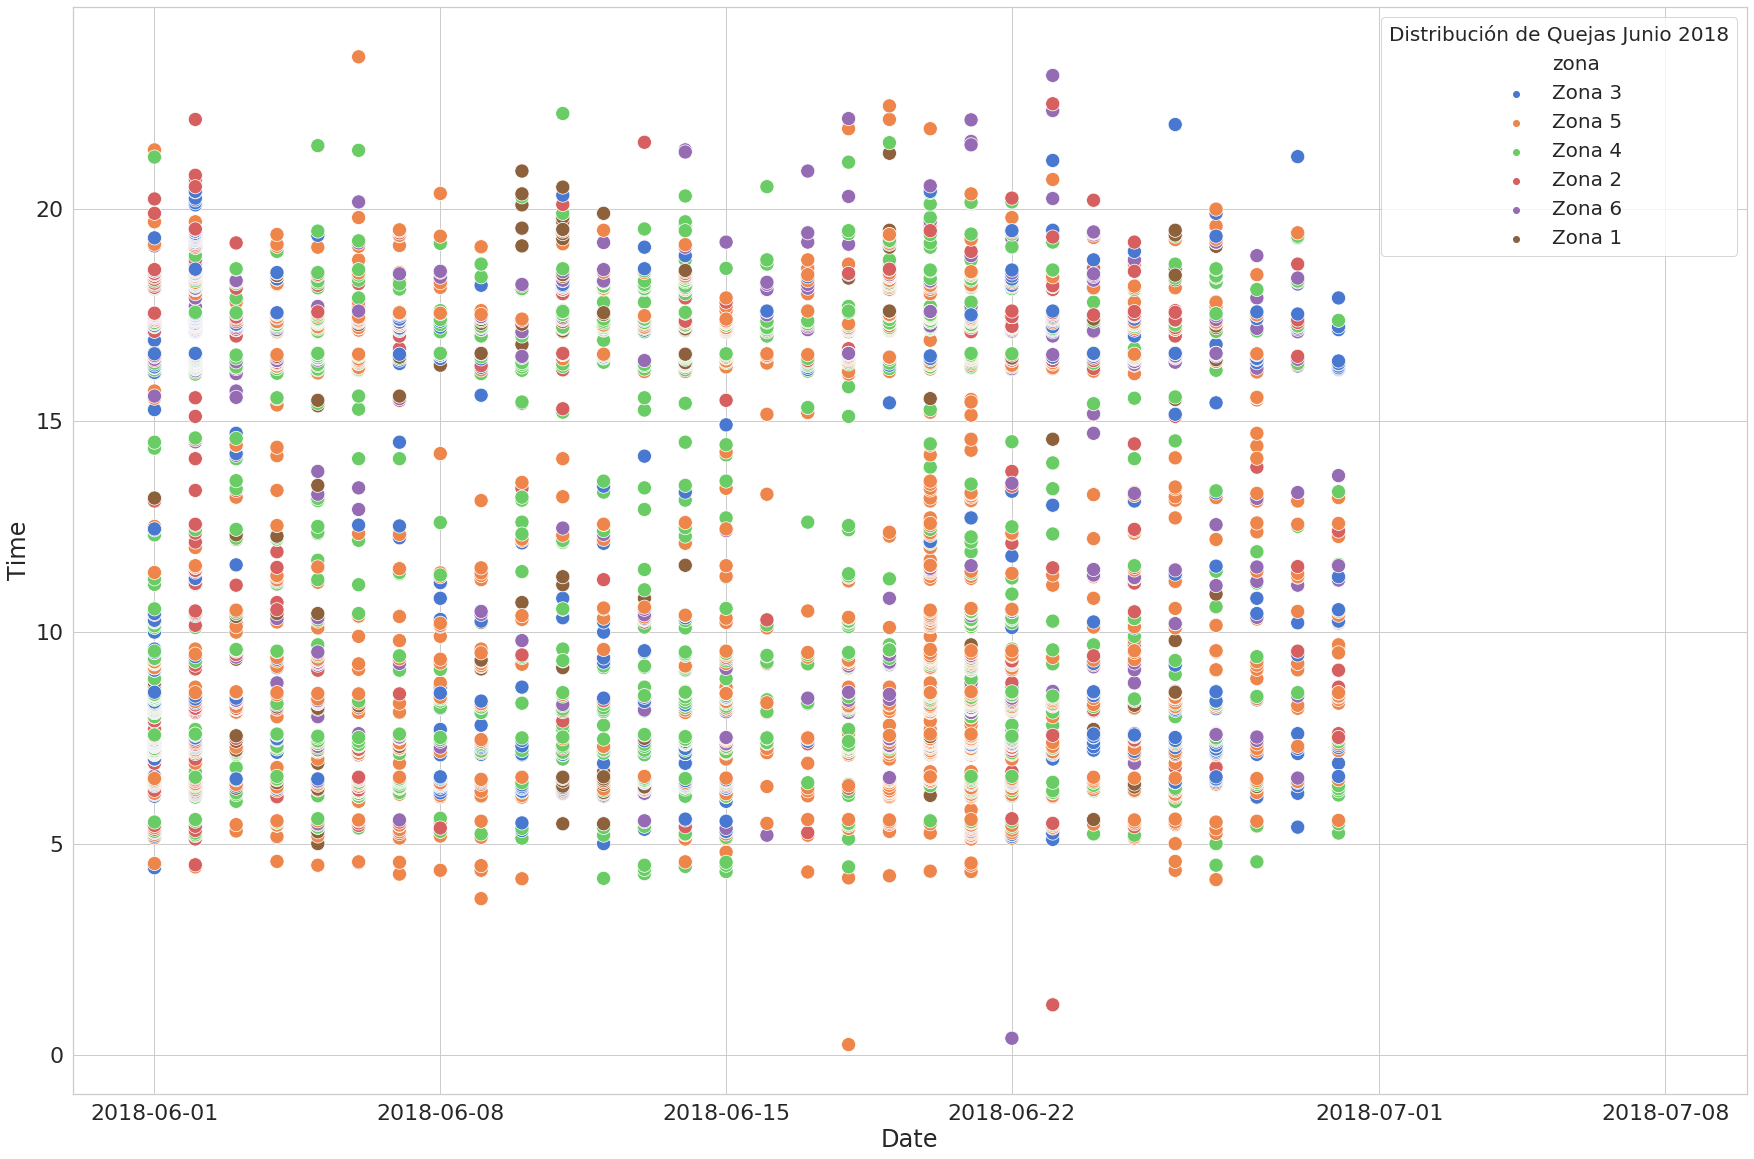

In [33]:
year = 2018
mes = df[df.Month == 6]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=2), mes.Date.max() + timedelta(days=10))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=200, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Junio ' + str(year))
mes.to_csv('csv_files/jun2018.csv')
aux = export_dayly_reports_by_month(mes, 'csv_files/jun2018.csv')
corr_matrix_jun18 = np.zeros(shape=(6,6))

# Clustering DBSCAN

In [36]:
XVAL = aux["2018-06-01"].dropna()
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2).fit(XVAL.values.reshape(-1, 1))
clustering.labels_

array([ 0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
        4,  4,  4,  5,  5

In [41]:
clustering.labels_.reshape(-1, 1)

array([[ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],

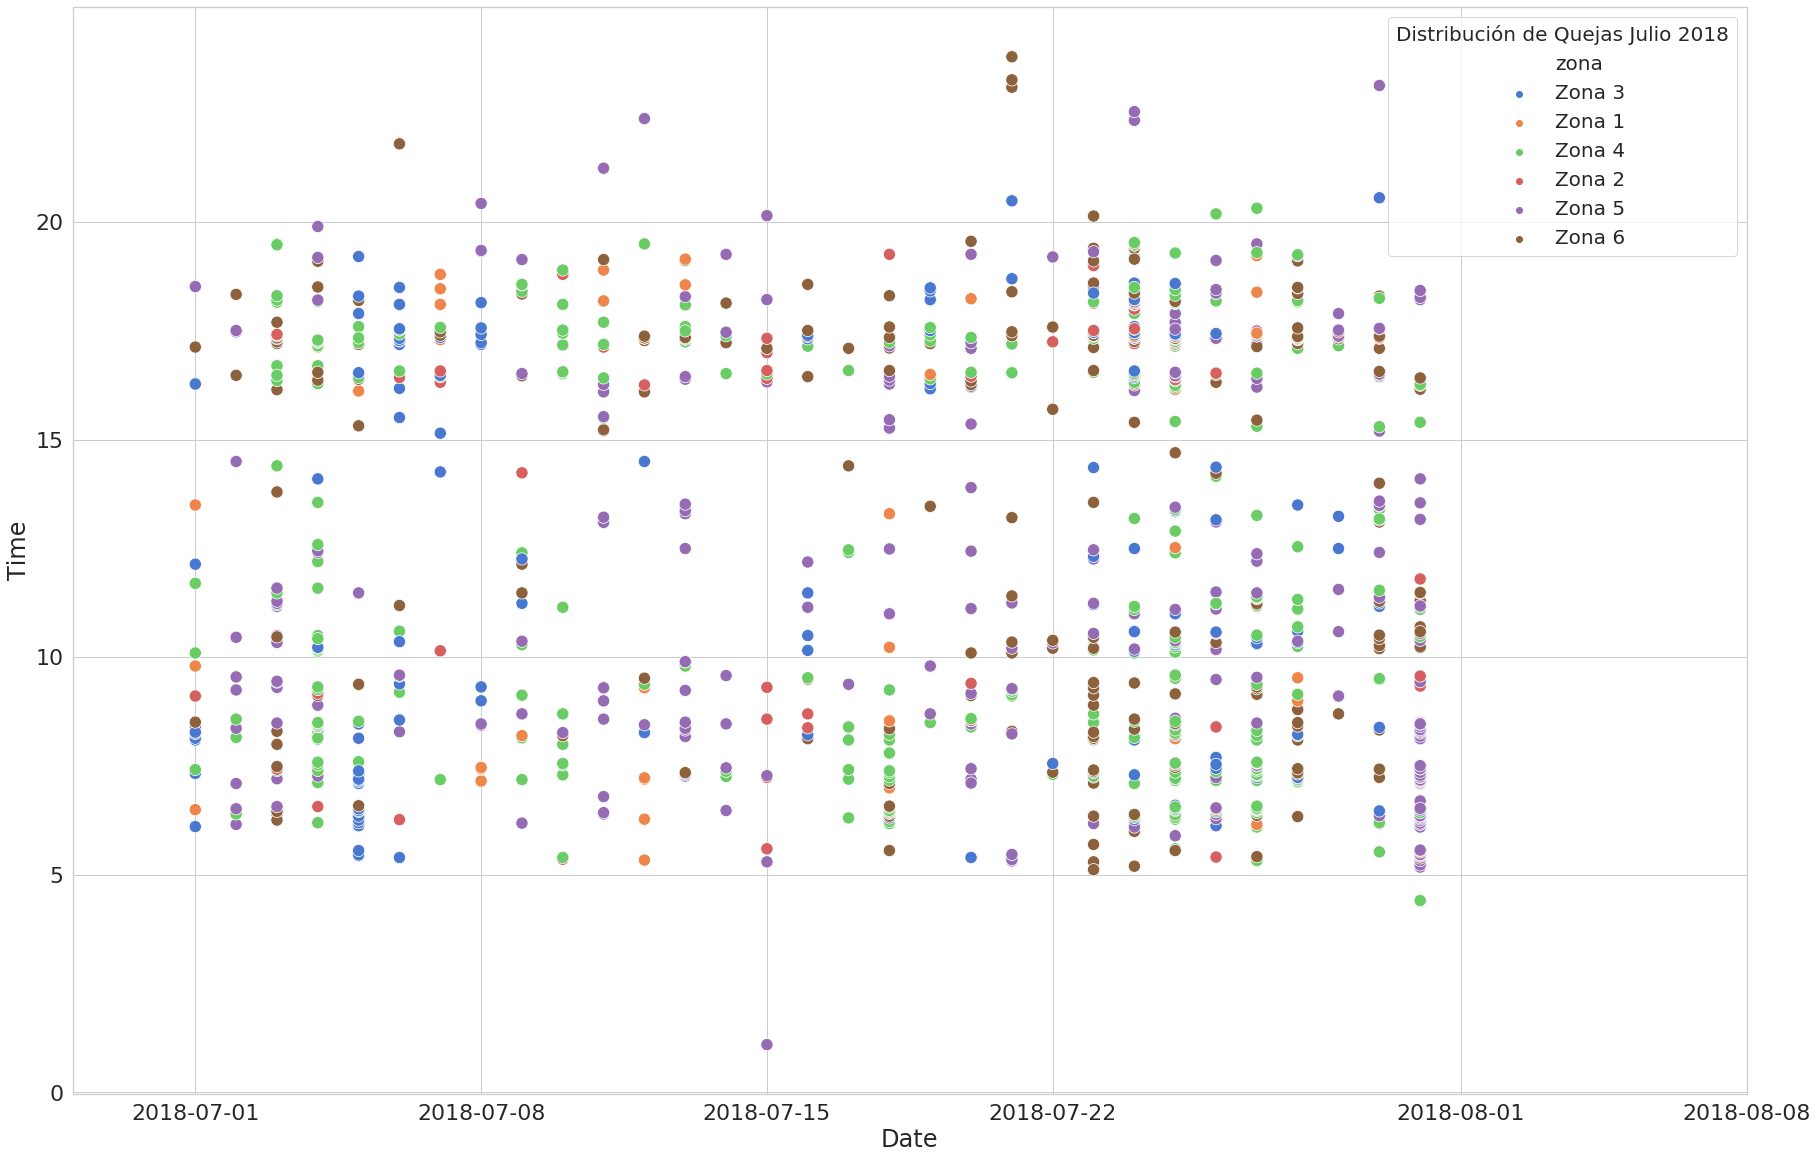

In [18]:
year = 2018
mes = df[df.Month == 7]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=8))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Julio ' + str(year))
mes.to_csv('csv_files/julio2018.csv')

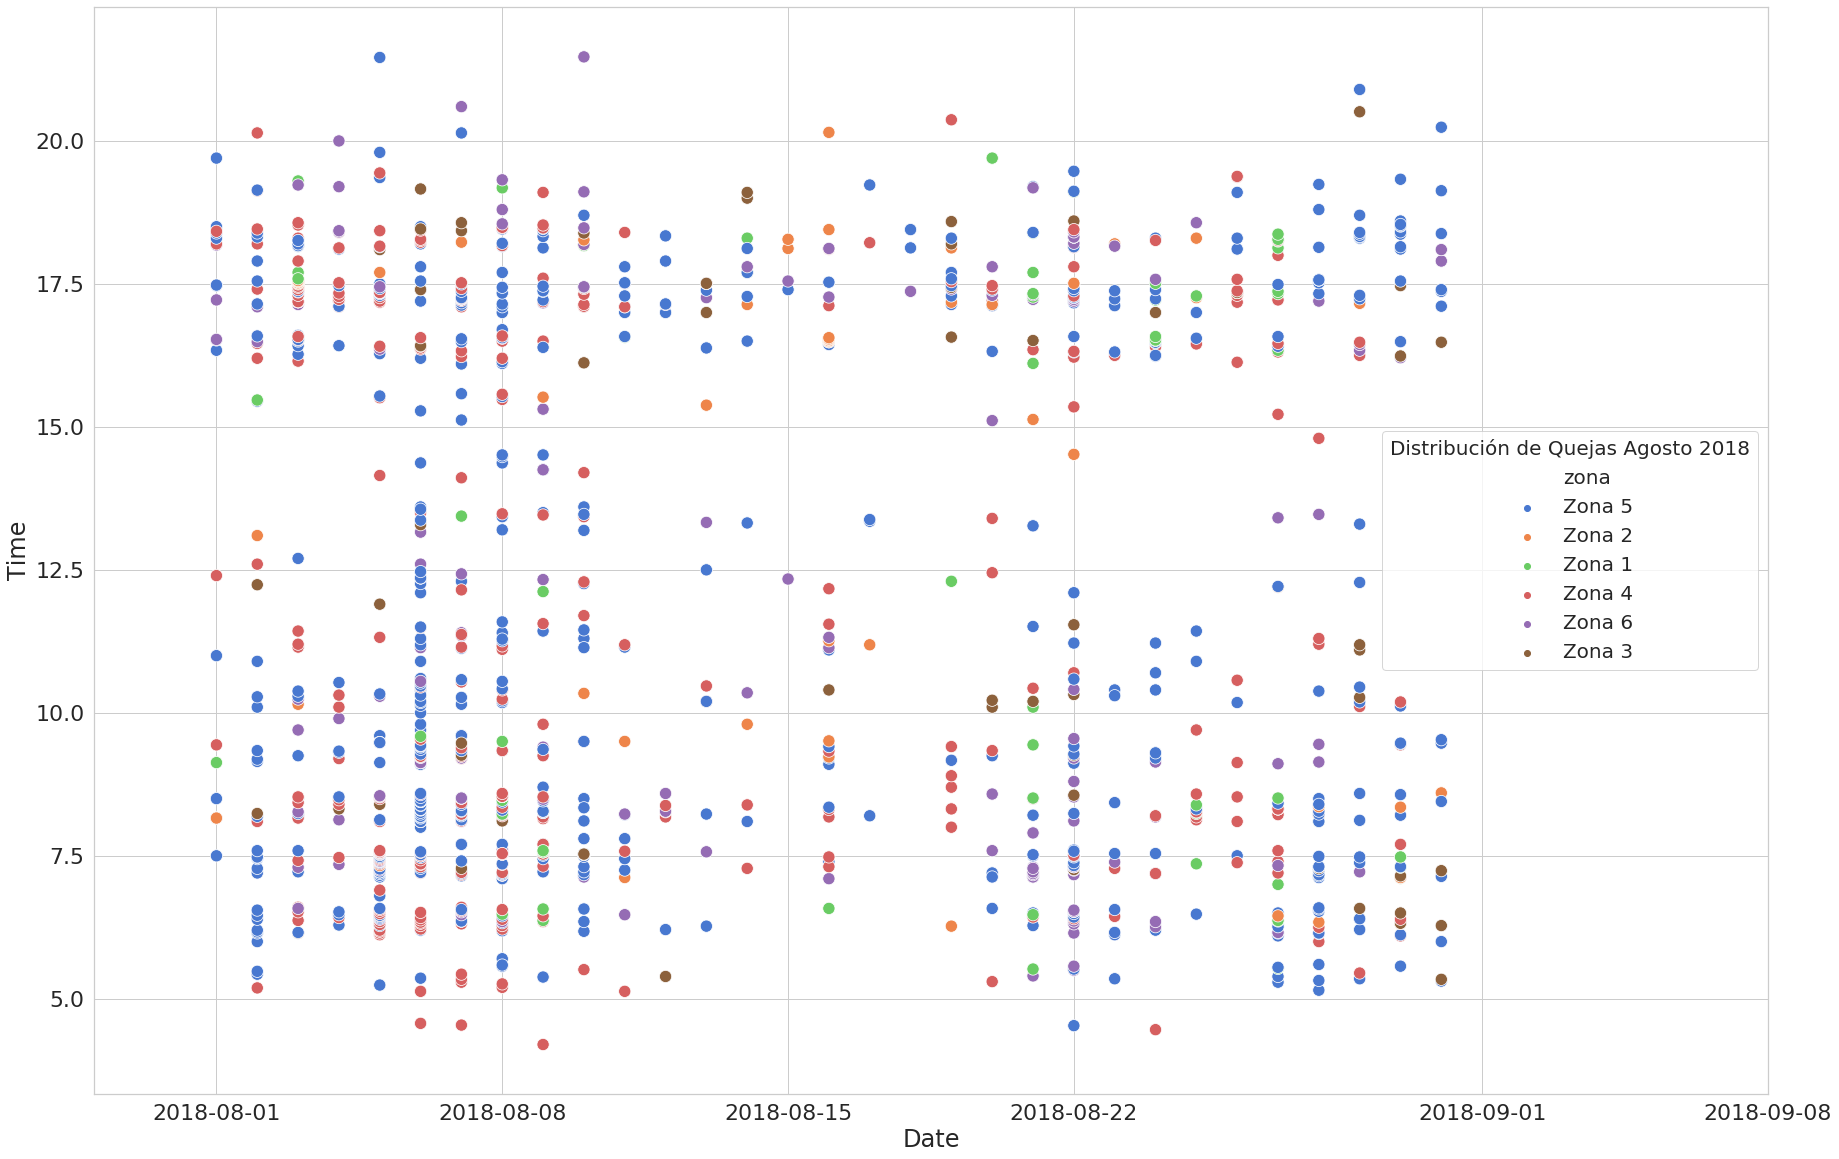

In [19]:
year = 2018
mes = df[df.Month == 8]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=8))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Agosto ' + str(year))
mes.to_csv('csv_files/aug2018.csv')

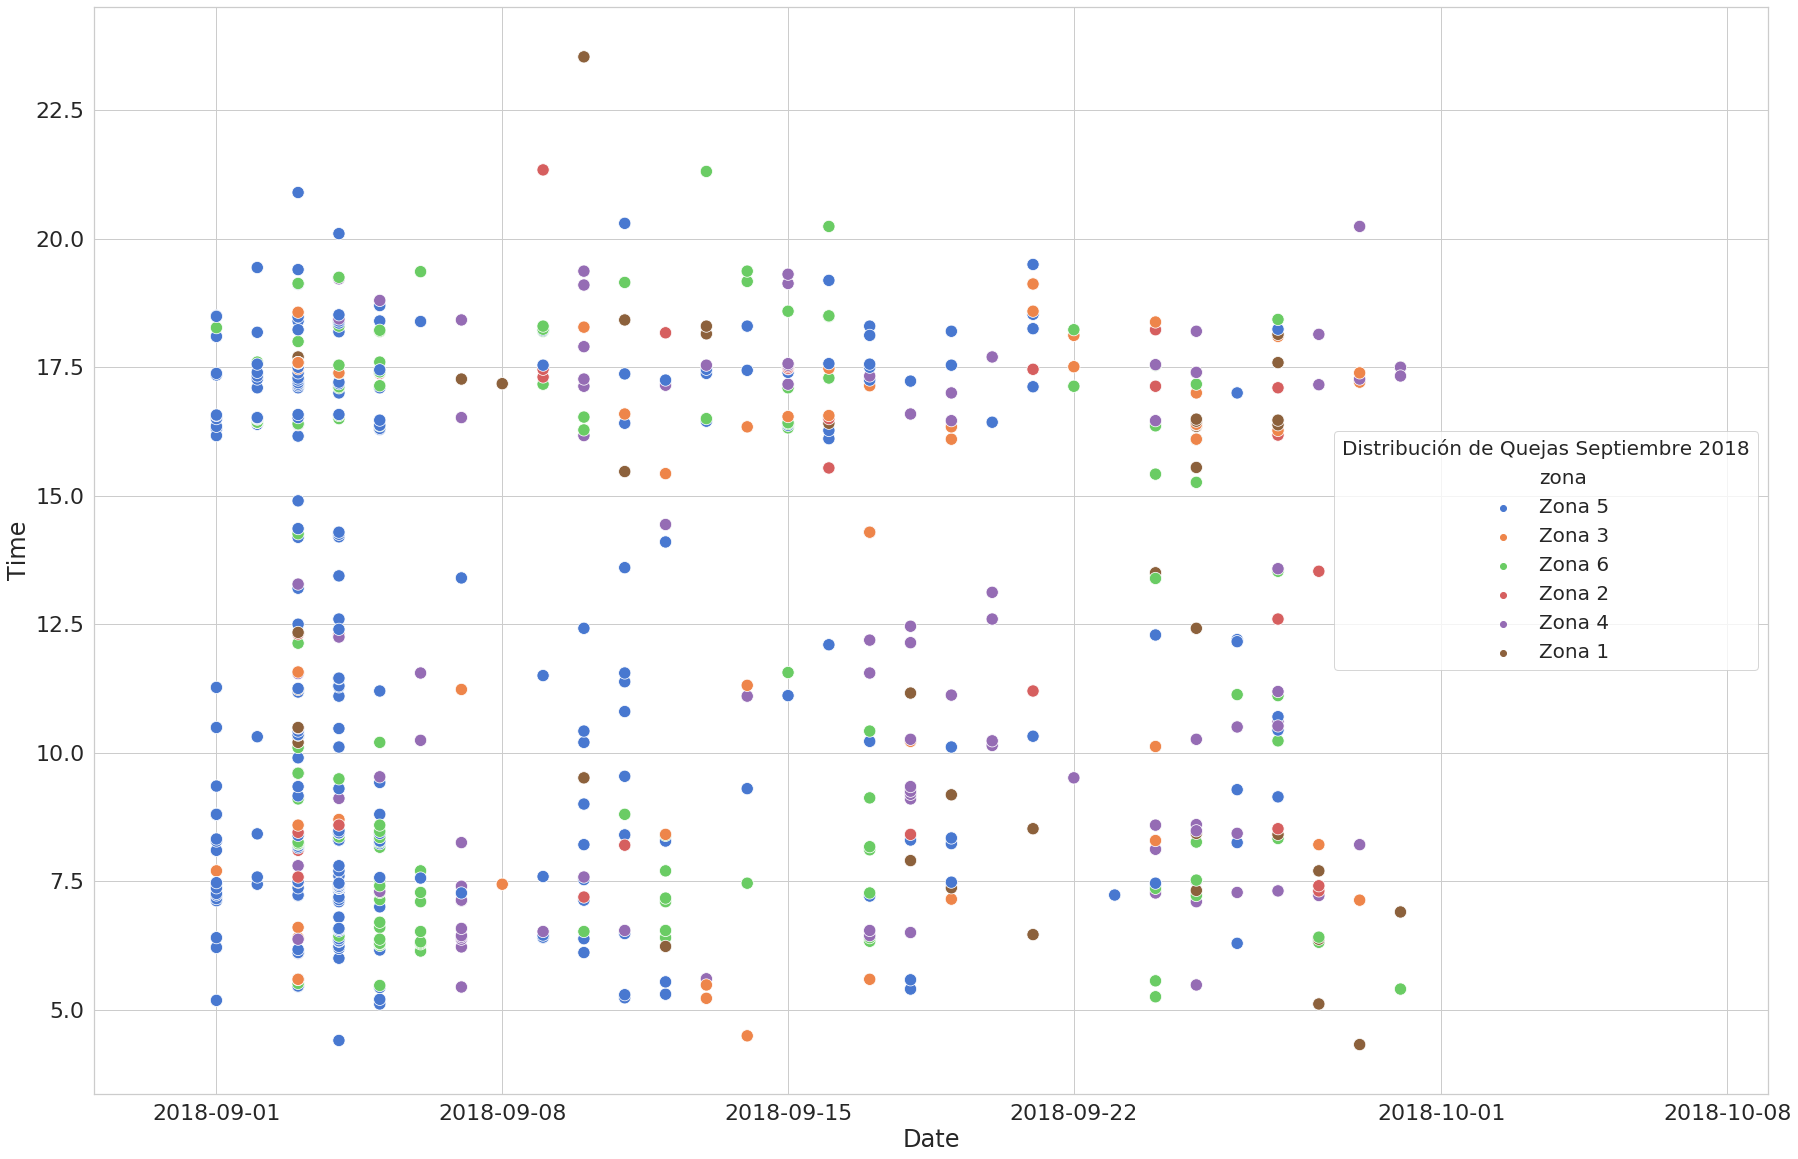

In [20]:
year = 2018
mes = df[df.Month == 9]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Septiembre ' + str(year))
mes.to_csv('csv_files/sept2018.csv')

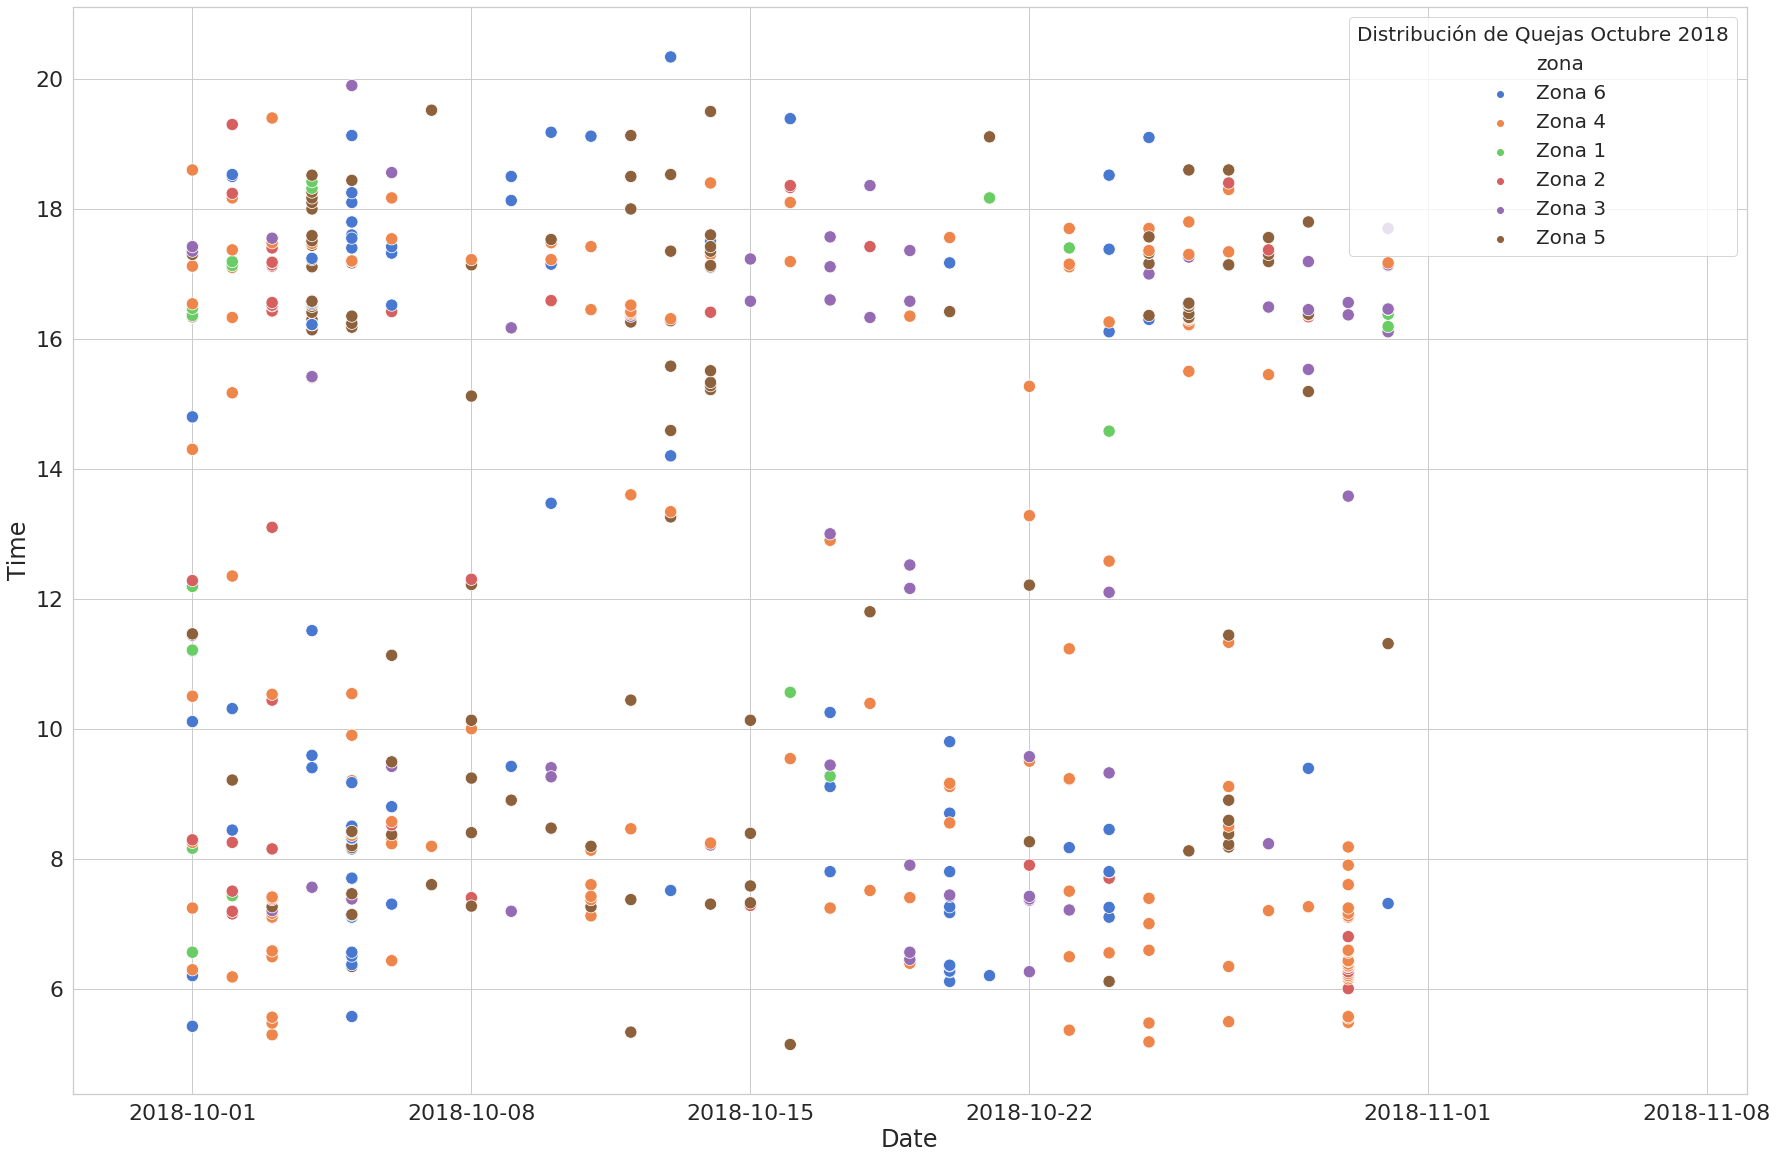

In [21]:
year = 2018
mes = df[df.Month == 10]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Octubre ' + str(year))
mes.to_csv('csv_files/oct2018.csv')

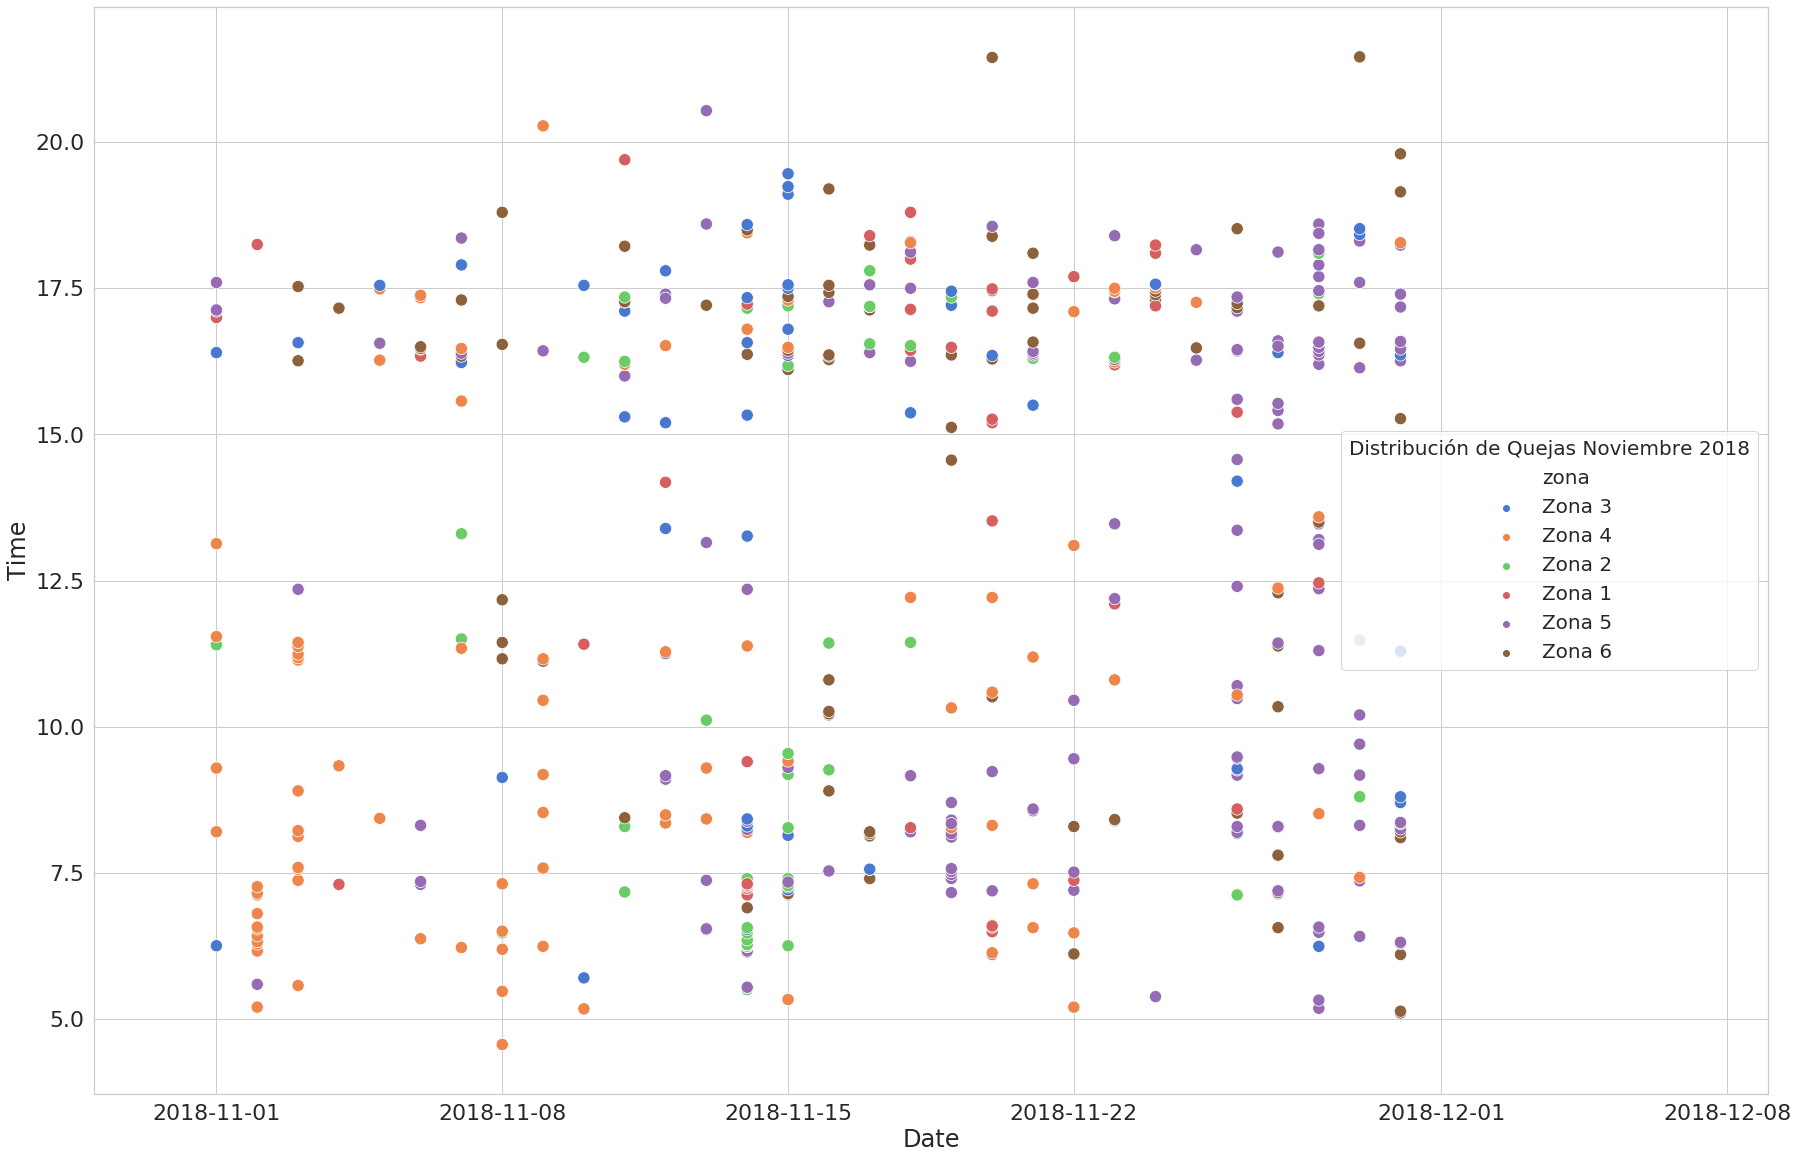

In [22]:
year = 2018
mes = df[df.Month == 11]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Noviembre ' + str(year))
mes.to_csv('csv_files/nov2018.csv')

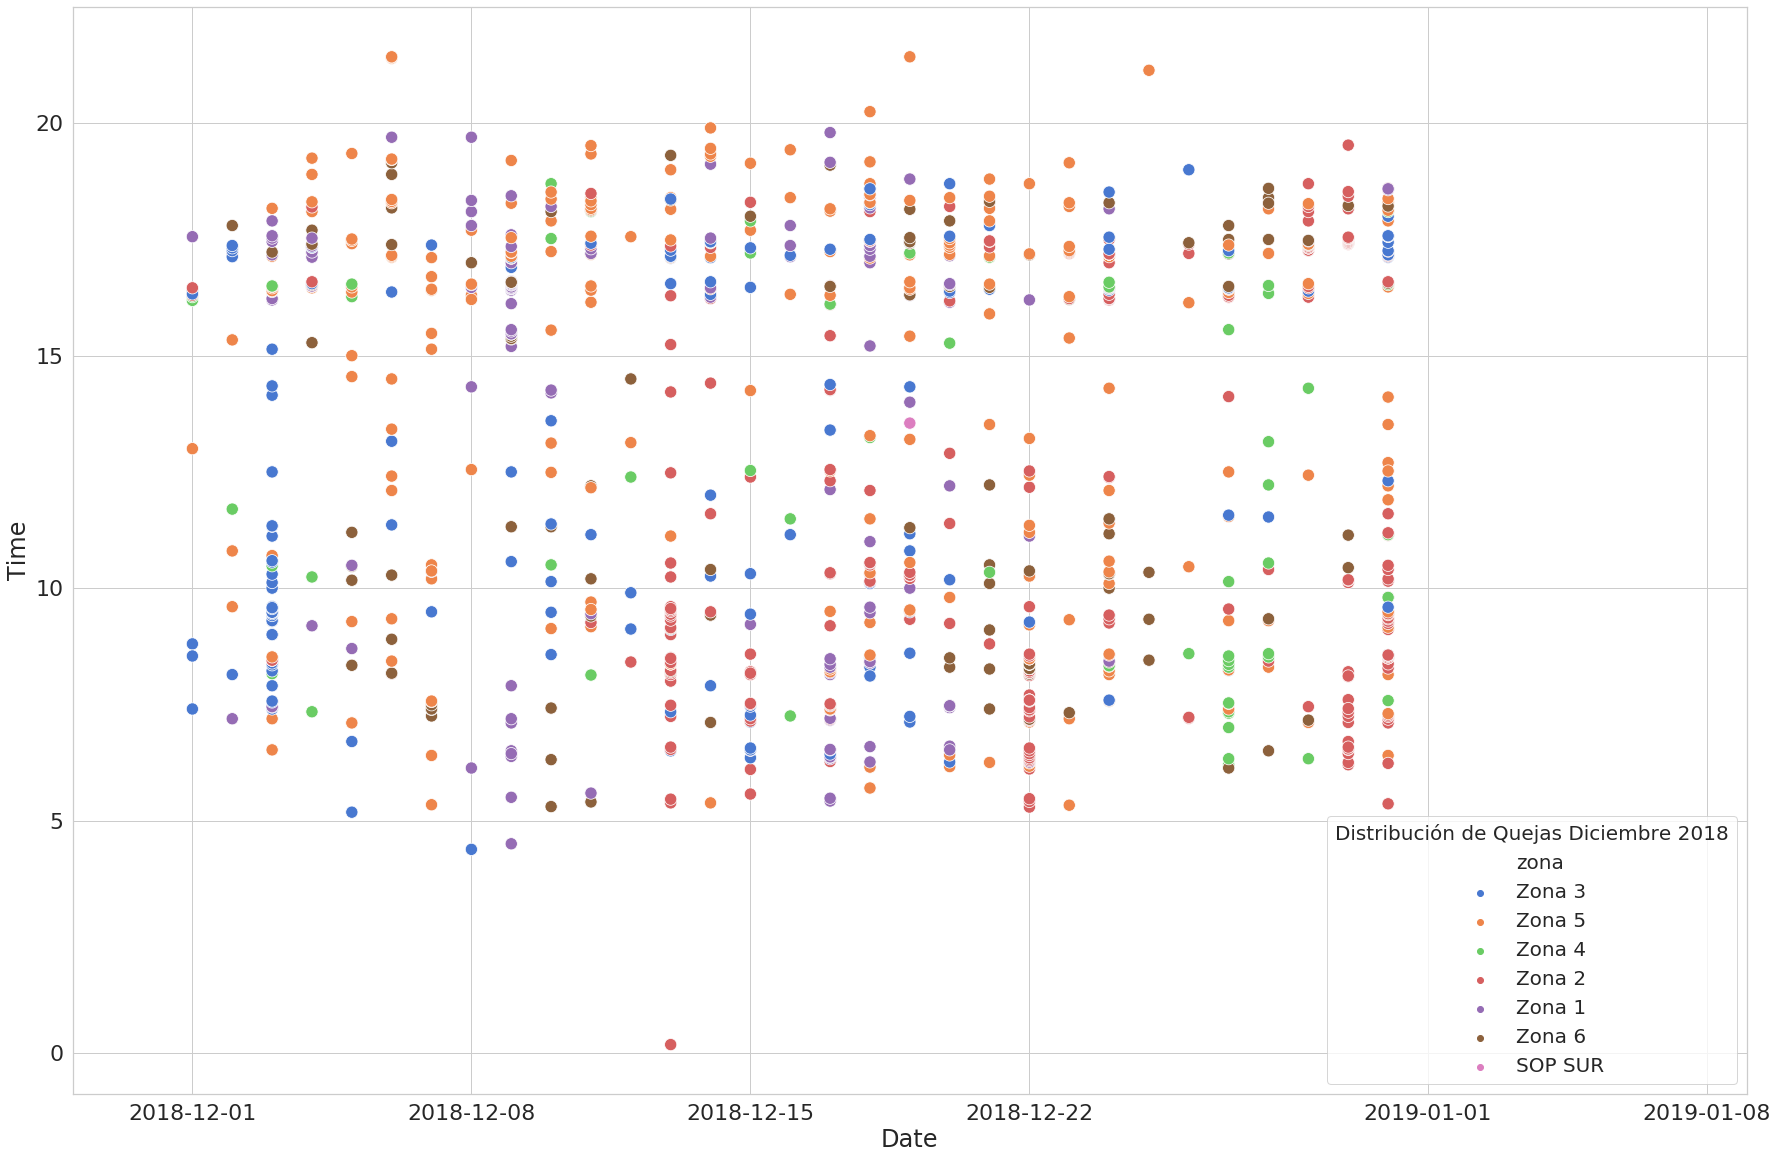

In [23]:
year = 2018
mes = df[df.Month == 12]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Diciembre ' + str(year))
mes.to_csv('csv_files/dic2018.csv')

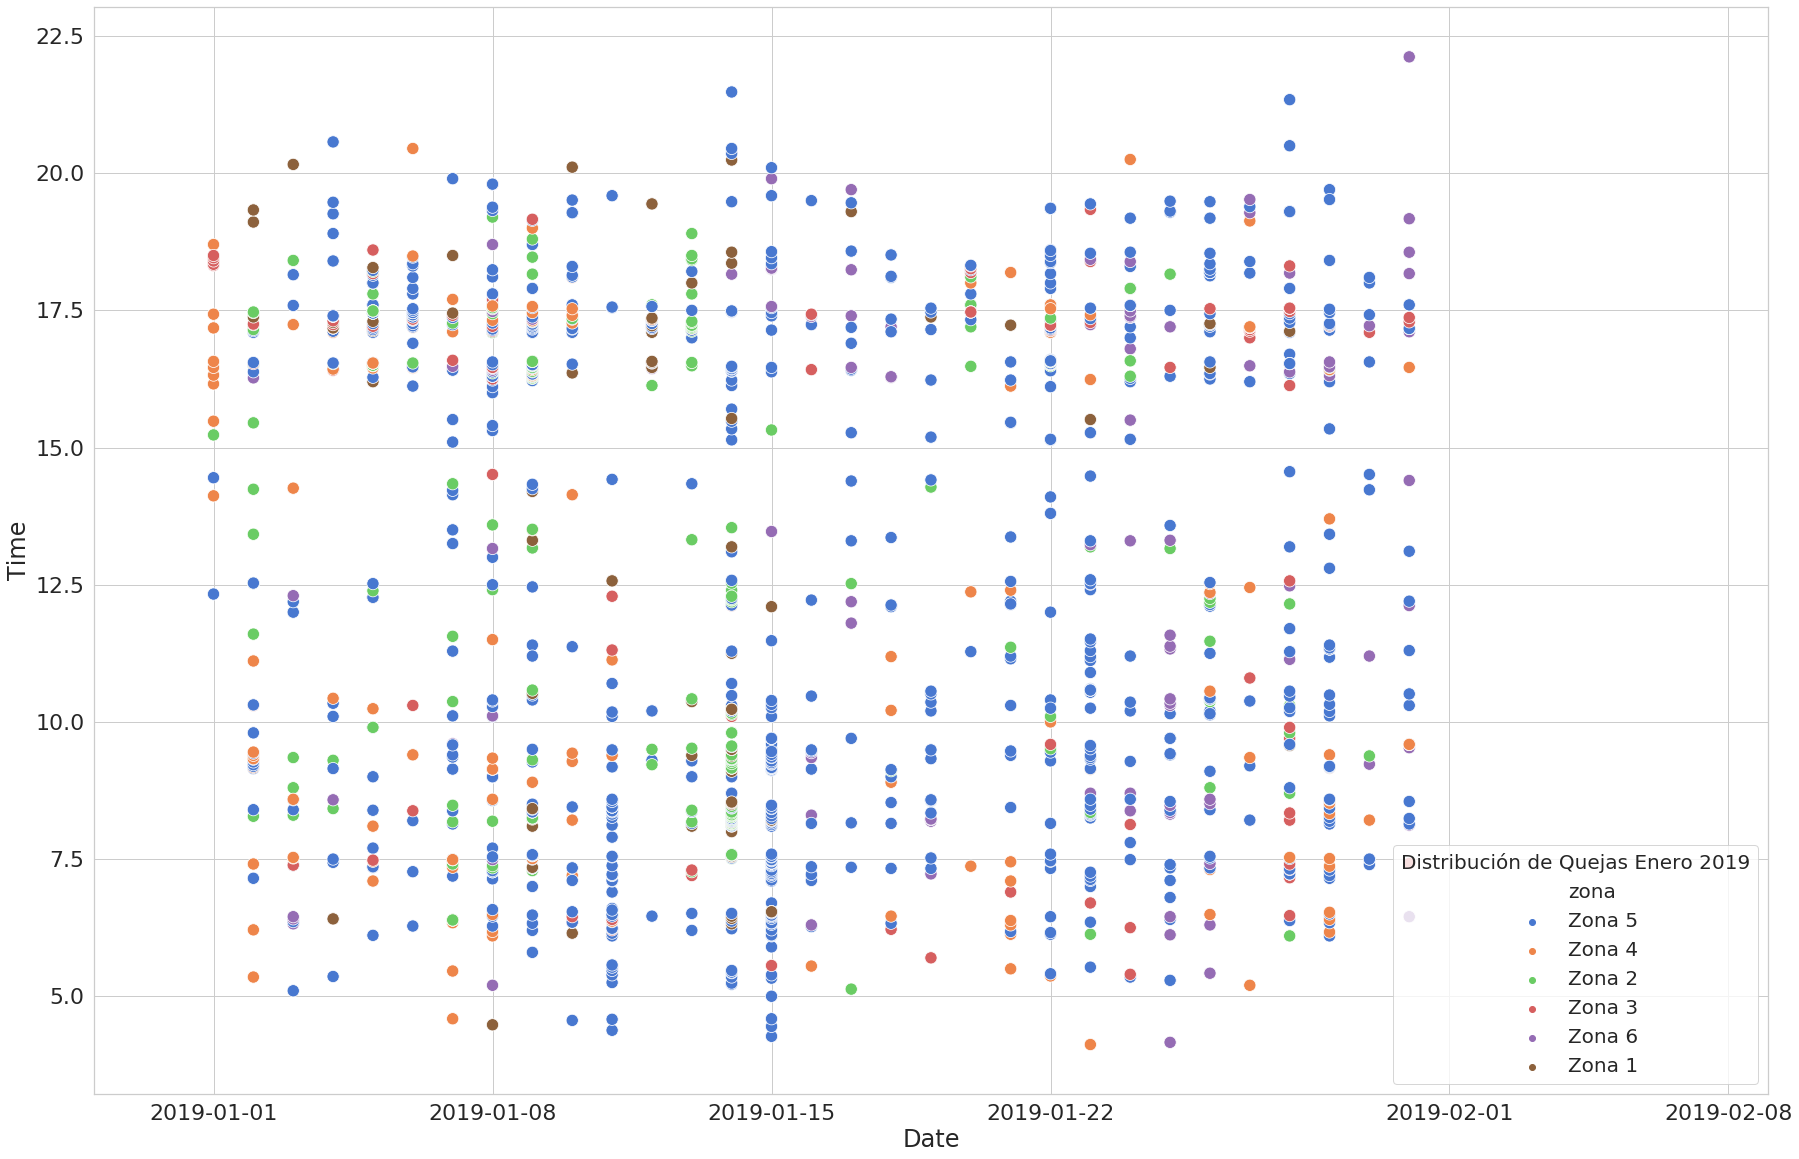

In [25]:
year = 2019
mes = df[df.Month == 1]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Enero ' + str(year))
mes.to_csv('csv_files/ener2019.csv')

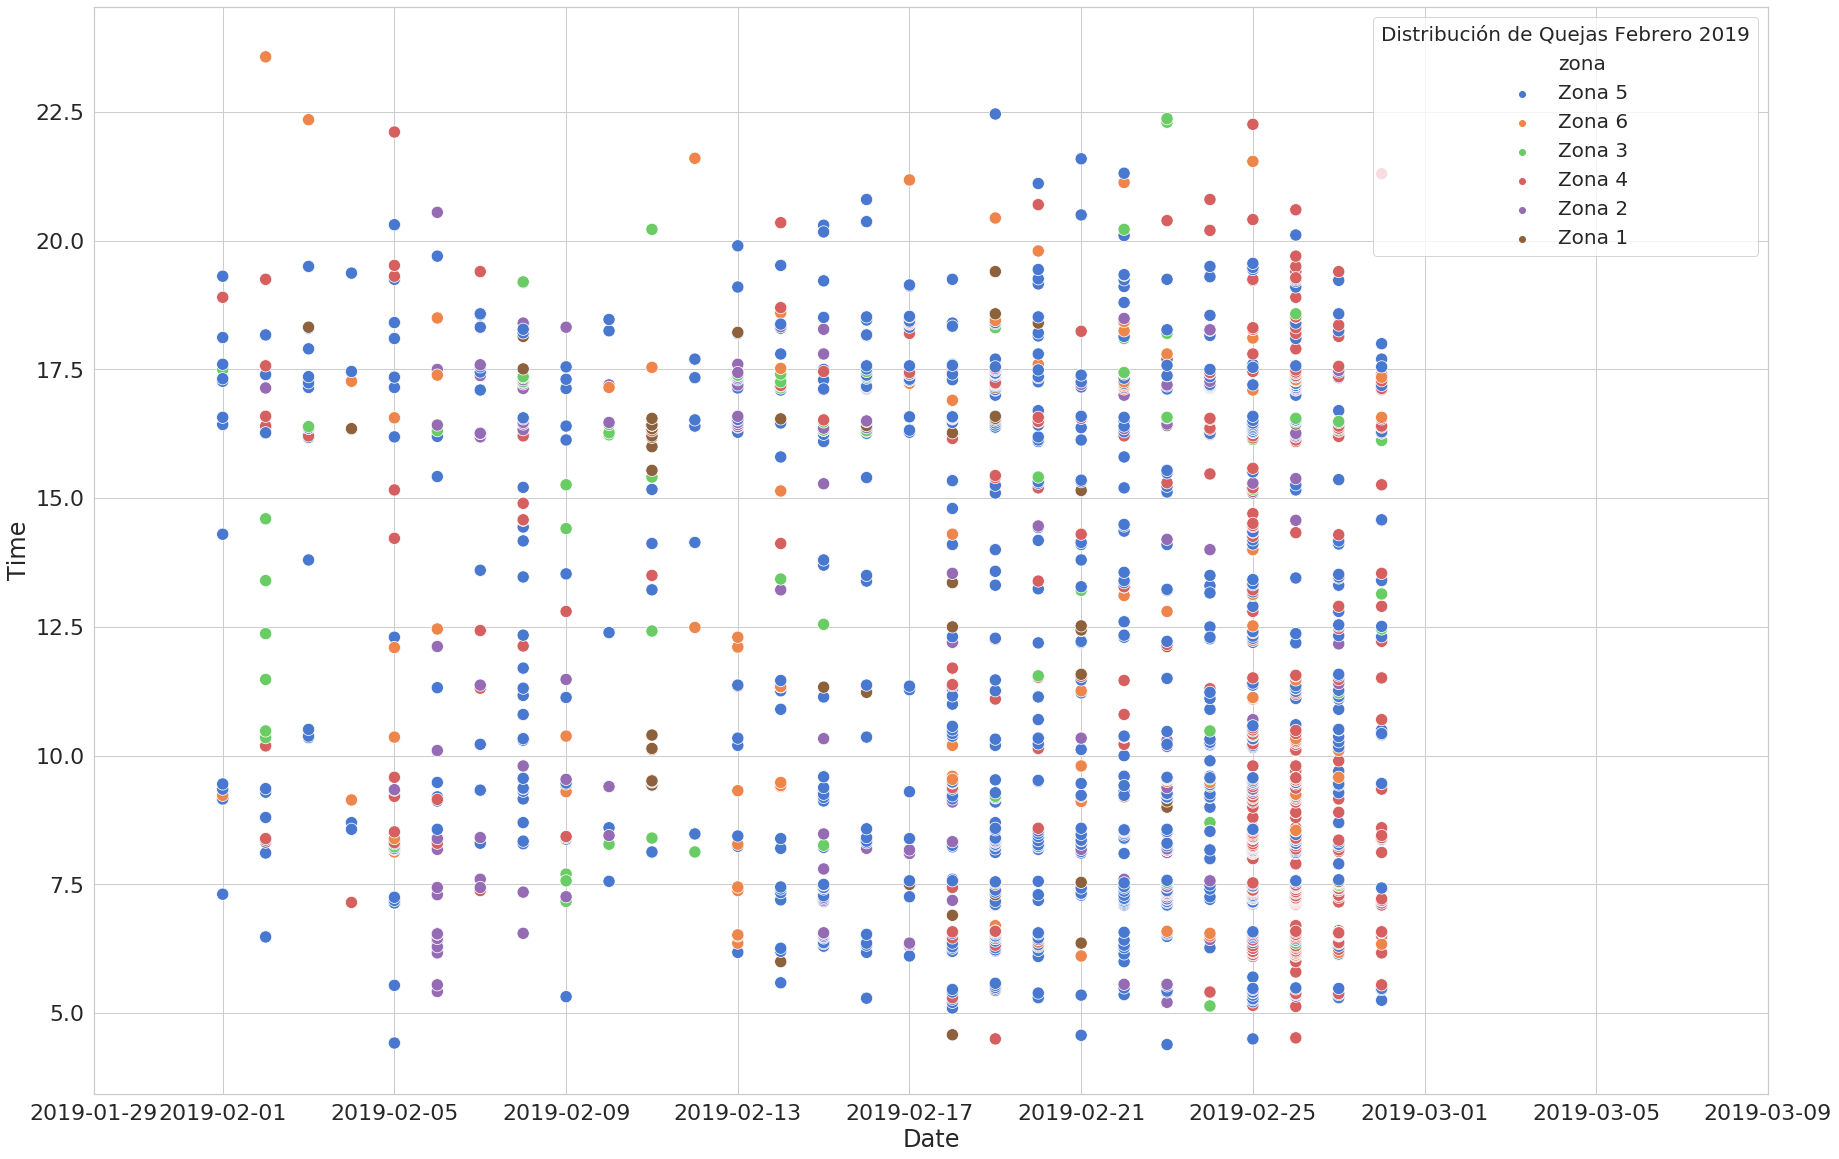

In [27]:
year = 2019
mes = df[df.Month == 2]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Febrero ' + str(year))
mes.to_csv('csv_files/feb2019.csv')

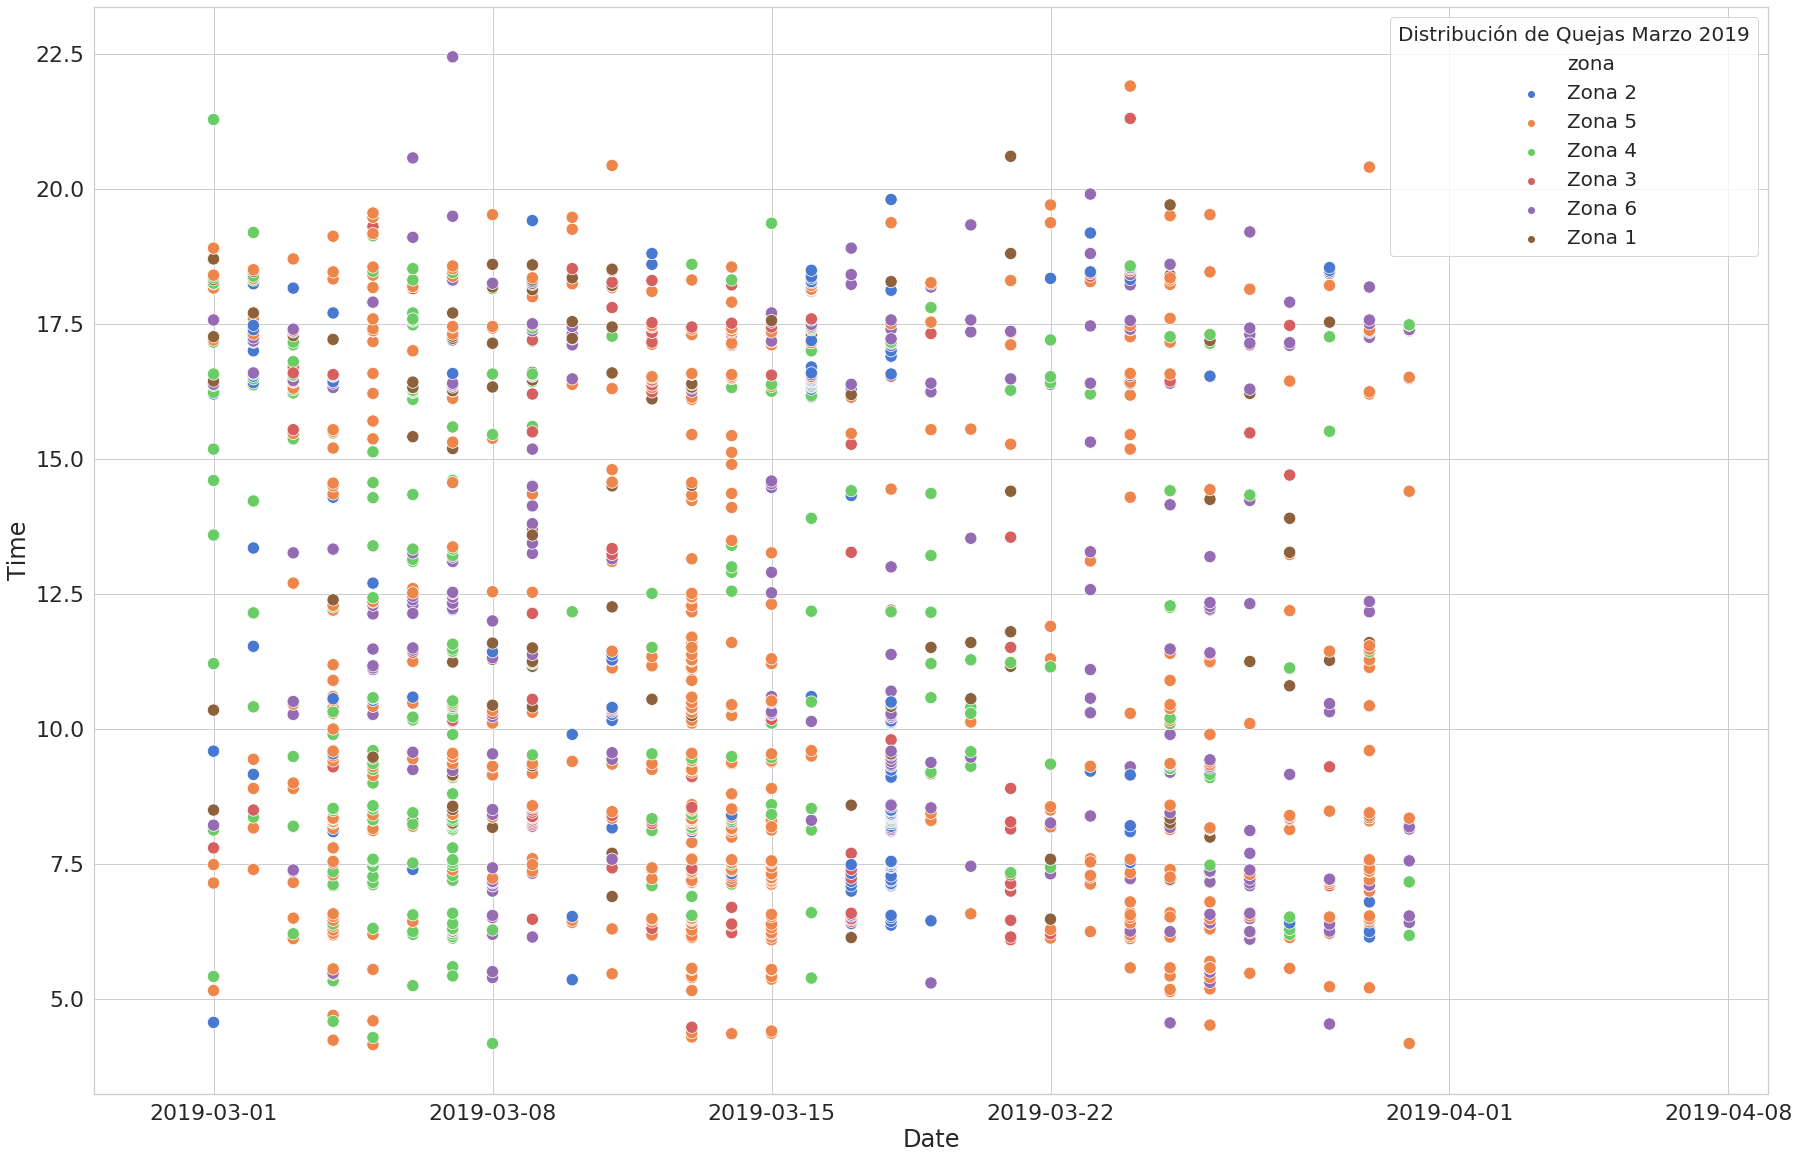

In [28]:
year = 2019
mes = df[df.Month == 3]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Marzo ' + str(year))
mes.to_csv('csv_files/marz2019.csv')

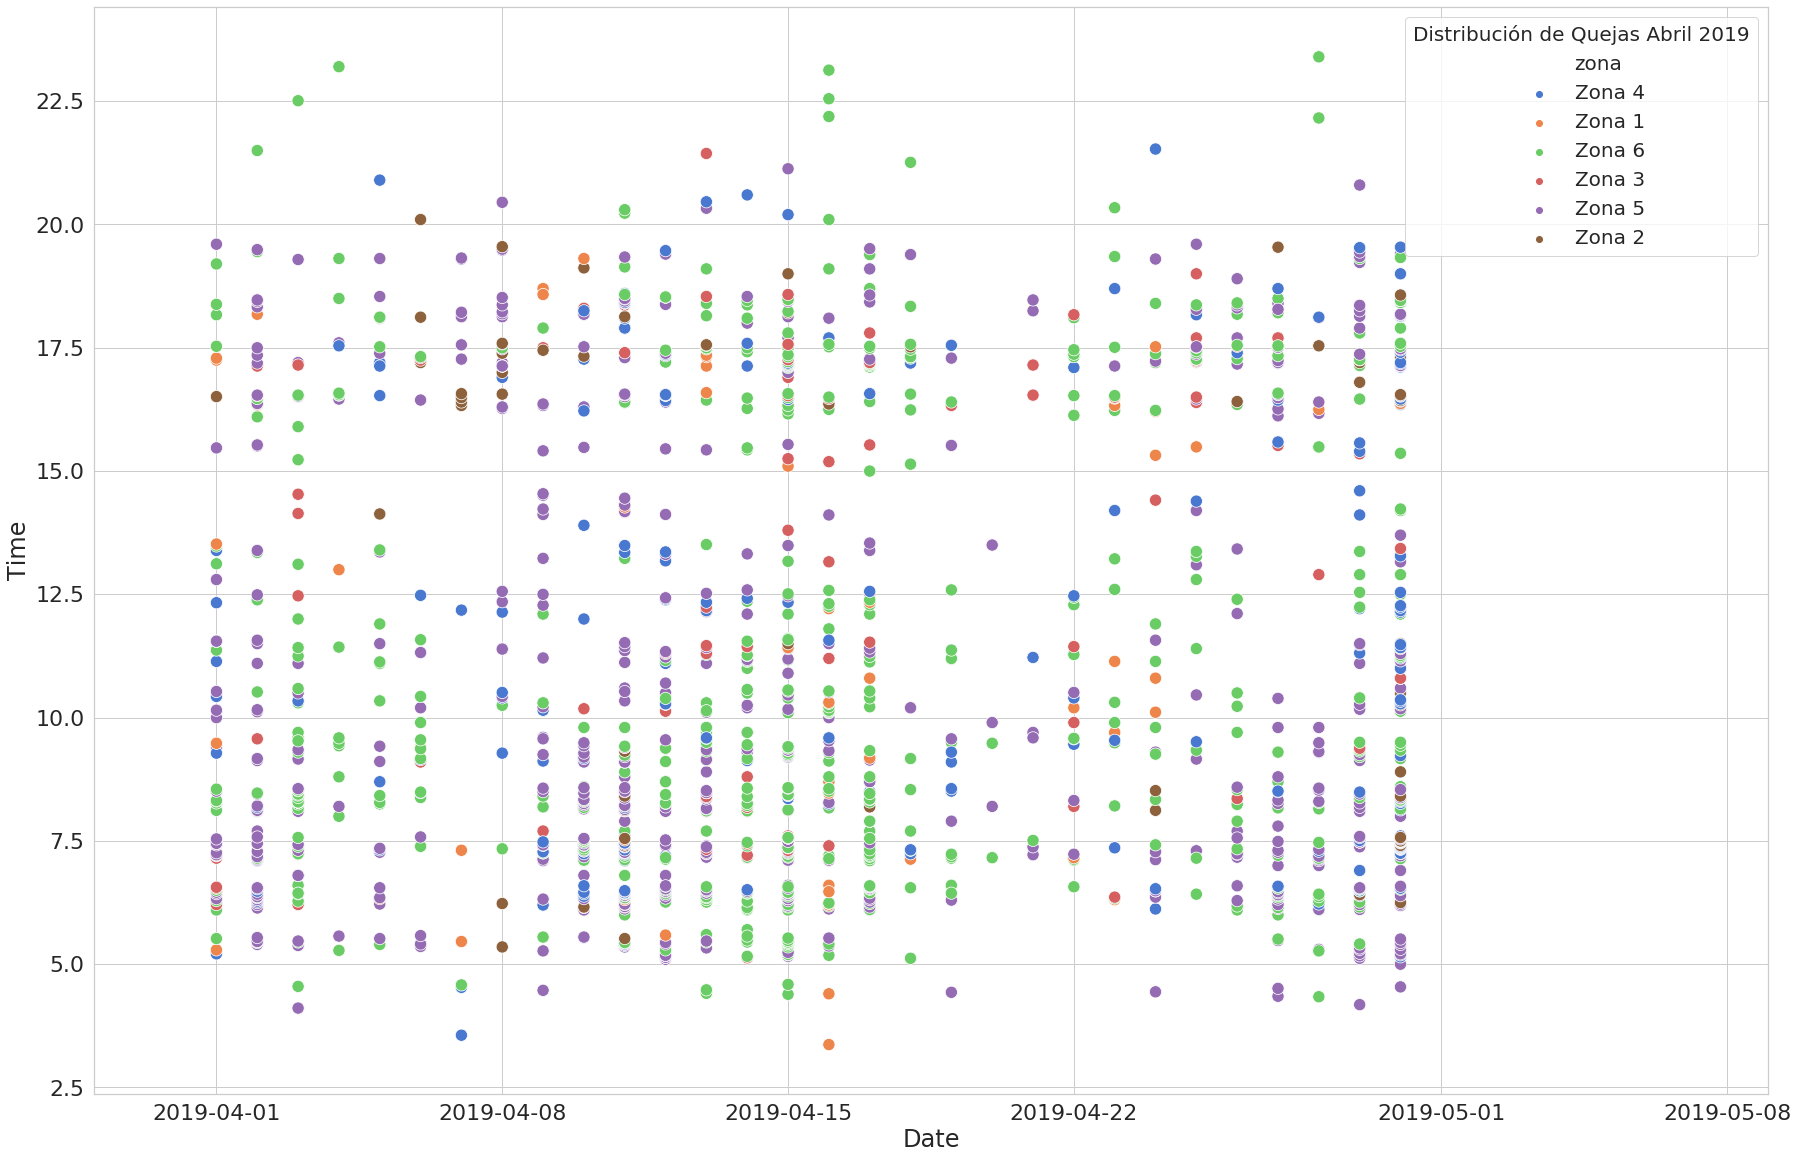

In [29]:
year = 2019
mes = df[df.Month == 4]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Abril ' + str(year))
mes.to_csv('csv_files/abril019.csv')

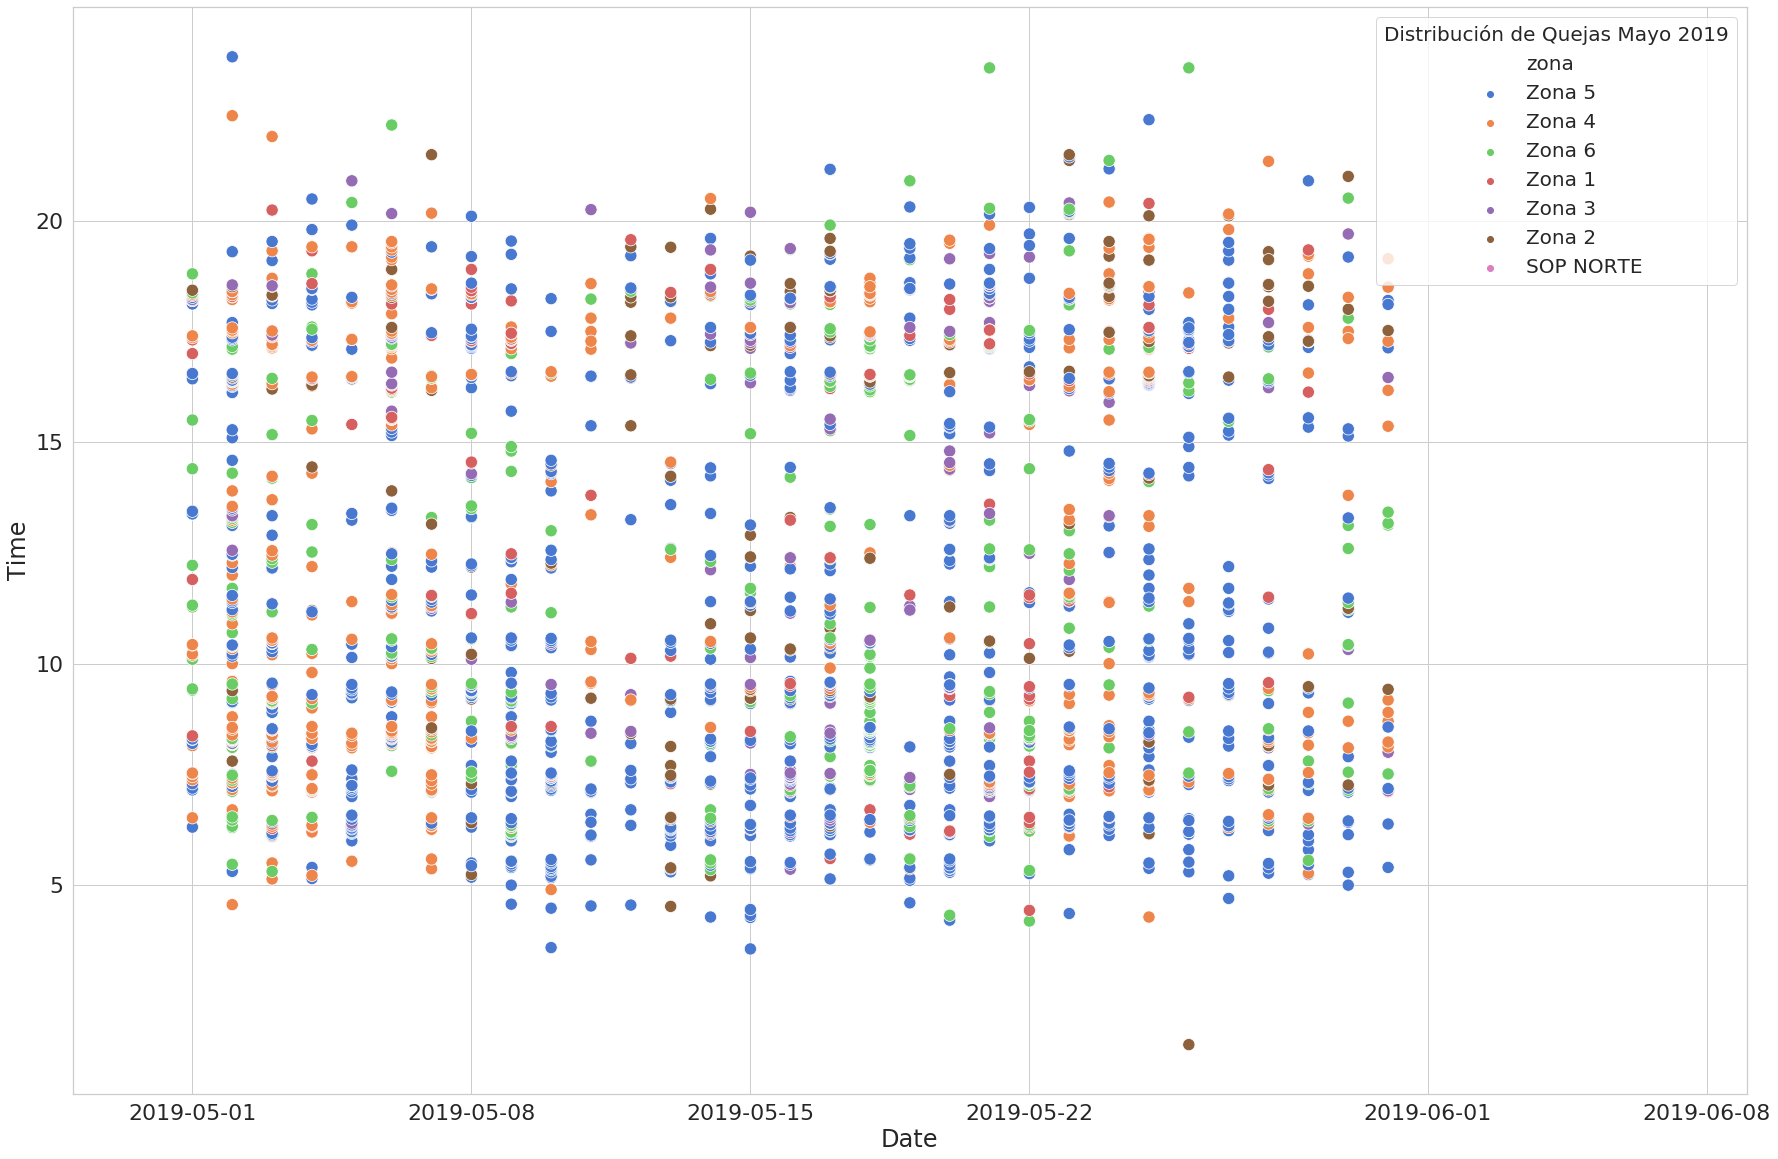

In [30]:
year = 2019
mes = df[df.Month == 5]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Mayo ' + str(year))
mes.to_csv('csv_files/may2019.csv')

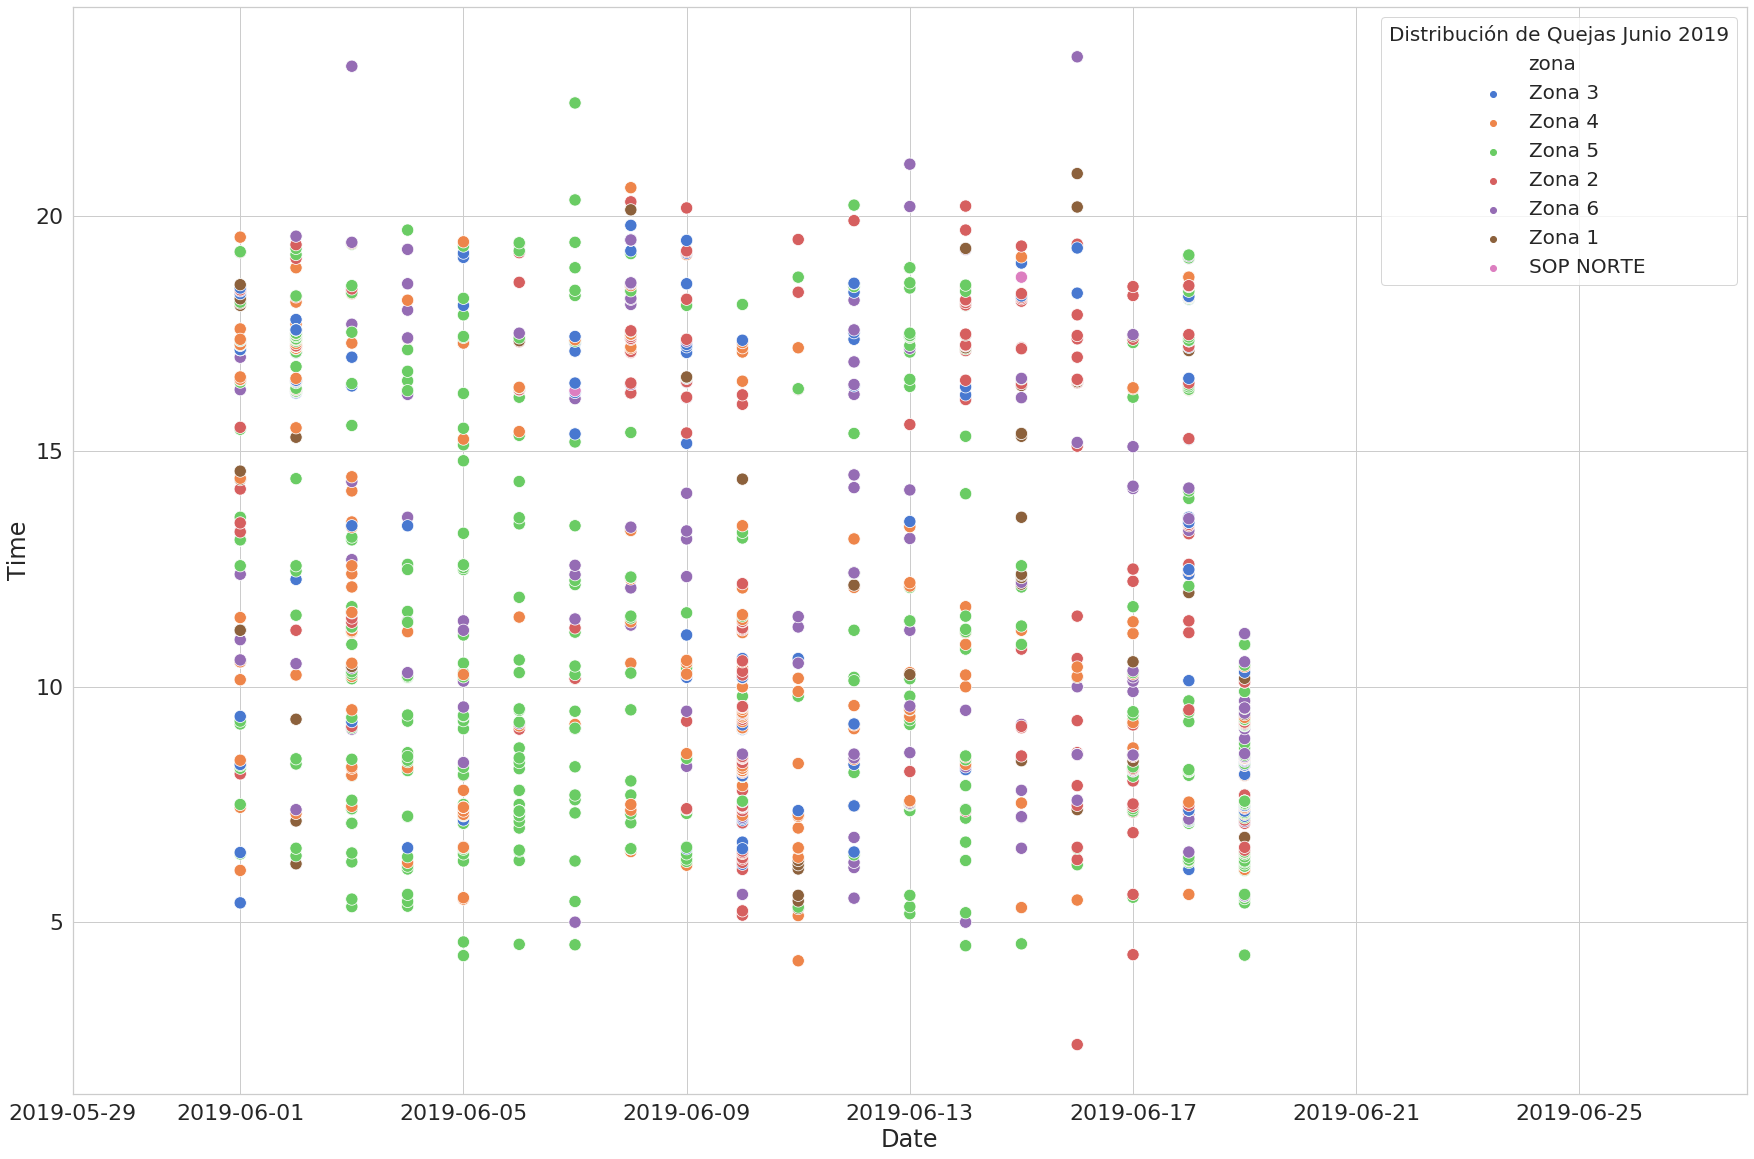

In [31]:
year = 2019
mes = df[df.Month == 6]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max() + timedelta(days=9))
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Junio ' + str(year))
mes.to_csv('csv_files/jun2019.csv')

In [34]:
year = 2019
mes = df[df.Month == 7]
mes = mes[mes.Year == year]
plt.xlim(mes.Date.min() - timedelta(days=3), mes.Date.max())
ax = sns.scatterplot(x="Date", y="Time", hue='zona', s=150, data=mes)
plt.legend(fontsize='20', title_fontsize='20', title='Distribución de Quejas Julio ' + str(year))
mes.to_csv('csv_files/feb2019.csv')

Empty DataFrame
Columns: [no. Folio, usuario, tipo de problema, zona, colonia, solucion/respuesta, status folio, Year, Month, Week, Weekday Name, Date, Time]
Index: []

# Reportes por meses

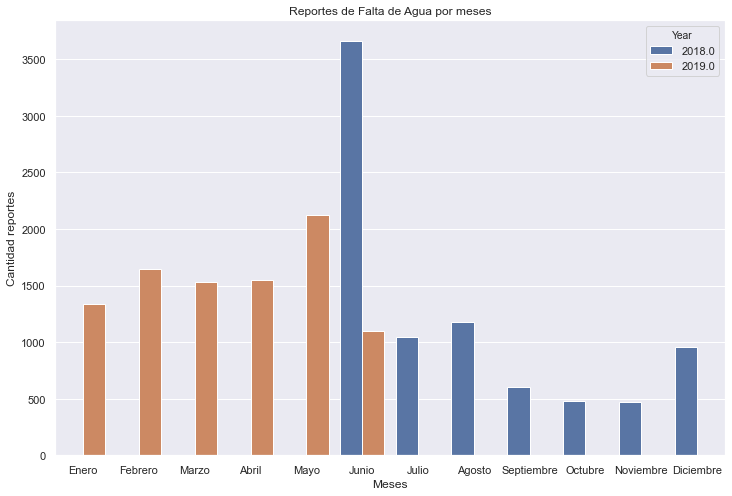

In [61]:
df.Month.value_counts()
grouped = df.groupby(['Month', 'Year']).size()
# grouped.reset_index(inplace=True)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='Year', data=df)
plt.title('Reportes de Falta de Agua por meses')
plt.xlabel('Meses')
plt.ylabel('Cantidad reportes')
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);

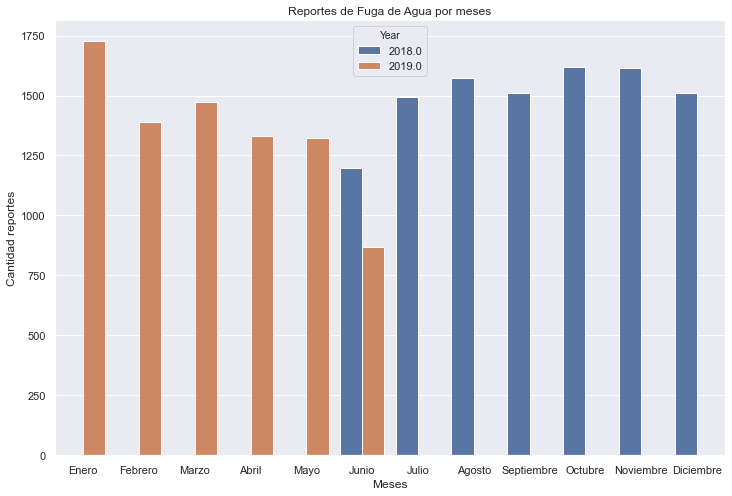

In [62]:
df_fuga_agua.Month.value_counts()
grouped = df_fuga_agua.groupby(['Month', 'Year']).size()
# grouped.reset_index(inplace=True)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='Year', data=df_fuga_agua)
plt.title('Reportes de Fuga de Agua por meses')
plt.xlabel('Meses')
plt.ylabel('Cantidad reportes')
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);

# Reportes por zonas

In [96]:
df.zona.value_counts()

Zona 5       6731
Zona 4       3677
Zona 6       2733
Zona 2       1764
Zona 3       1692
Zona 1       1074
SOP NORTE       3
SOP SUR         1
Name: zona, dtype: int64

Text(0, 0.5, 'Cantidad reportes')

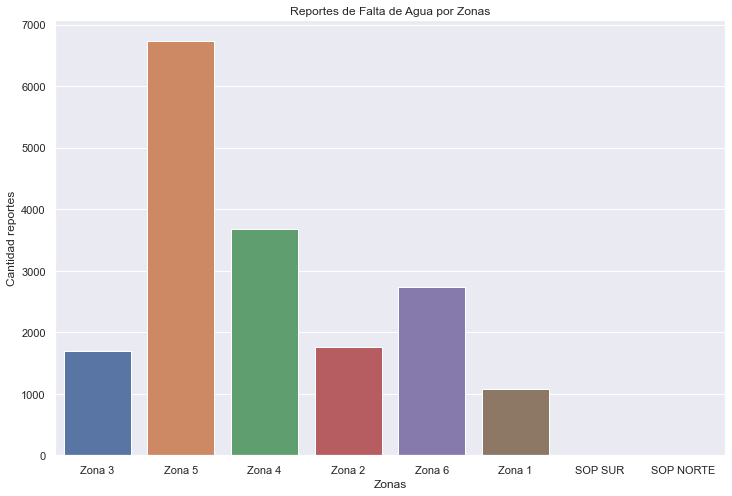

In [100]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df.zona)
plt.title('Reportes de Falta de Agua por Zonas')
plt.xlabel('Zonas')
plt.ylabel('Cantidad reportes')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

Text(0, 0.5, 'Cantidad reportes')

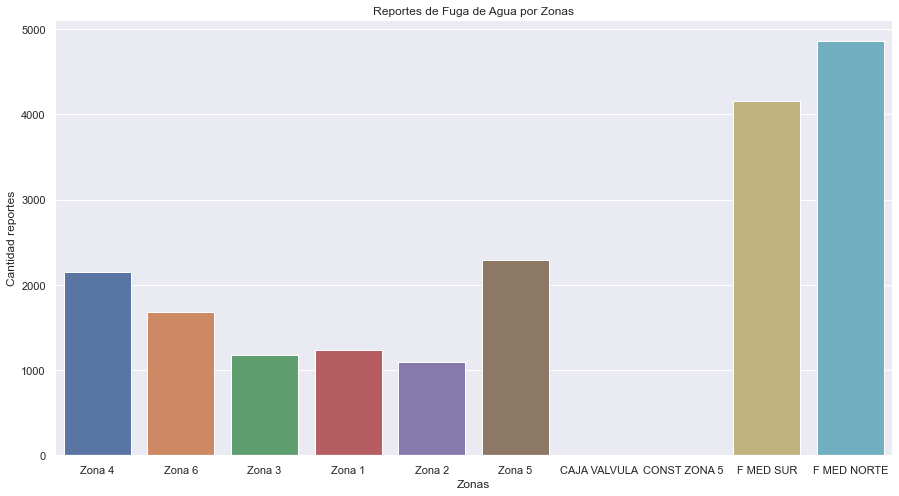

In [105]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df_fuga_agua.zona)
plt.title('Reportes de Fuga de Agua por Zonas')
plt.xlabel('Zonas')
plt.ylabel('Cantidad reportes')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

# Reportes por Colonias

Text(0, 0.5, 'Colonias')

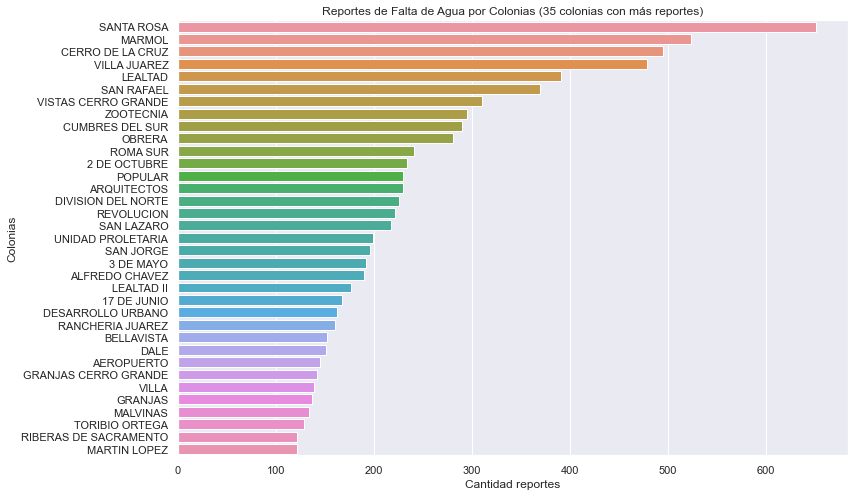

In [122]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, y='colonia', order=df.colonia.value_counts().iloc[:35].index)
plt.title('Reportes de Falta de Agua por Colonias (35 colonias con más reportes)')
plt.xlabel('Cantidad reportes')
plt.ylabel('Colonias')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

Text(0, 0.5, 'Colonias')

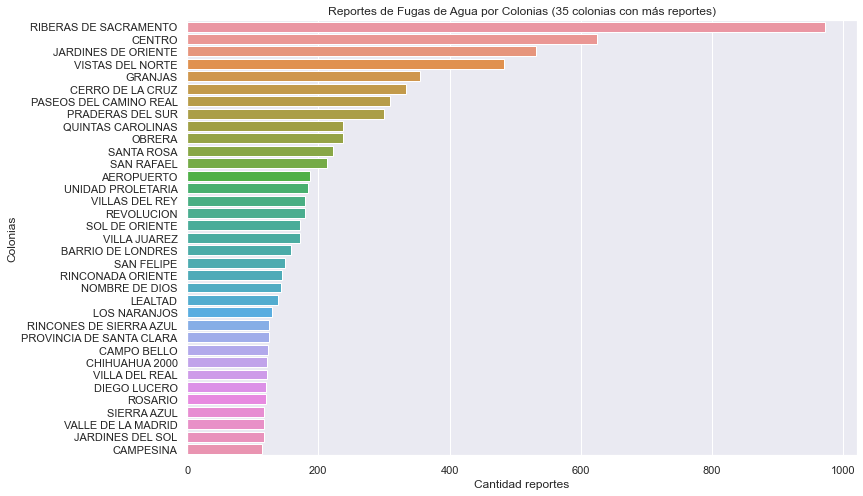

In [125]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_fuga_agua, y='colonia', order=df_fuga_agua.colonia.value_counts().iloc[:35].index)
plt.title('Reportes de Fugas de Agua por Colonias (35 colonias con más reportes)')
plt.xlabel('Cantidad reportes')
plt.ylabel('Colonias')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

Text(0, 0.5, 'Respuestas')

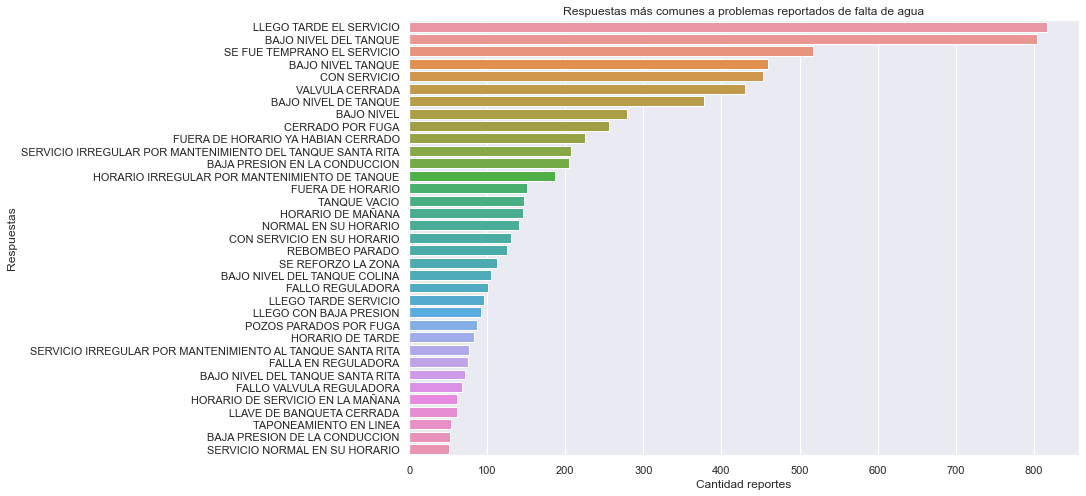

In [131]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, y='solucion/respuesta', order=df['solucion/respuesta'].value_counts().iloc[:35].index)
plt.title('Respuestas más comunes a problemas reportados de falta de agua')
plt.xlabel('Cantidad reportes')
plt.ylabel('Respuestas')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

Text(0, 0.5, 'Respuestas')

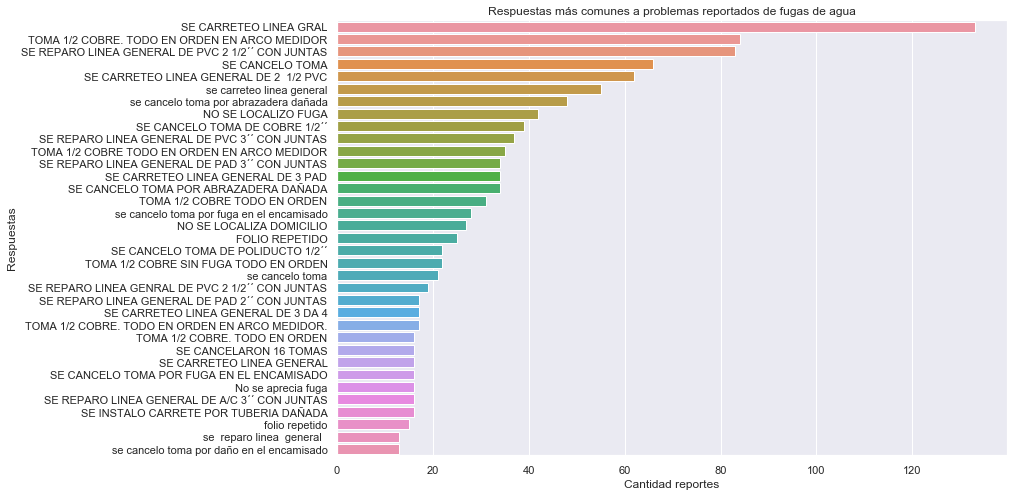

In [92]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_fuga_agua, y='solucion/respuesta', order=df_fuga_agua['solucion/respuesta'].value_counts().iloc[:35].index)
plt.title('Respuestas más comunes a problemas reportados de fugas de agua')
plt.xlabel('Cantidad reportes')
plt.ylabel('Respuestas')
#ax.set_xticklabels(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', '', '']);

# Cantidad de Reportes por Usuarios

Text(0, 0.5, 'Usuarios')

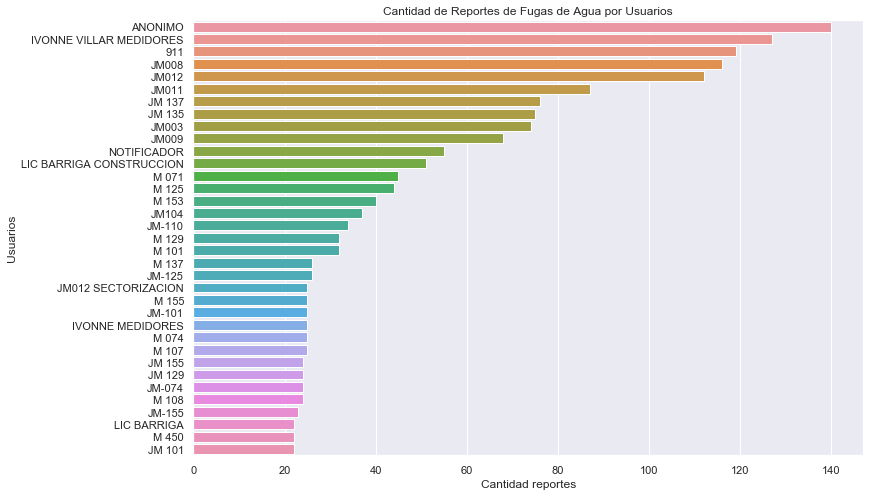

In [97]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_fuga_agua, y='usuario', order=df_fuga_agua['usuario'].value_counts().iloc[:35].index)
plt.title('Cantidad de Reportes de Fugas de Agua por Usuarios')
plt.xlabel('Cantidad reportes')
plt.ylabel('Usuarios')

Text(0, 0.5, 'Usuarios')

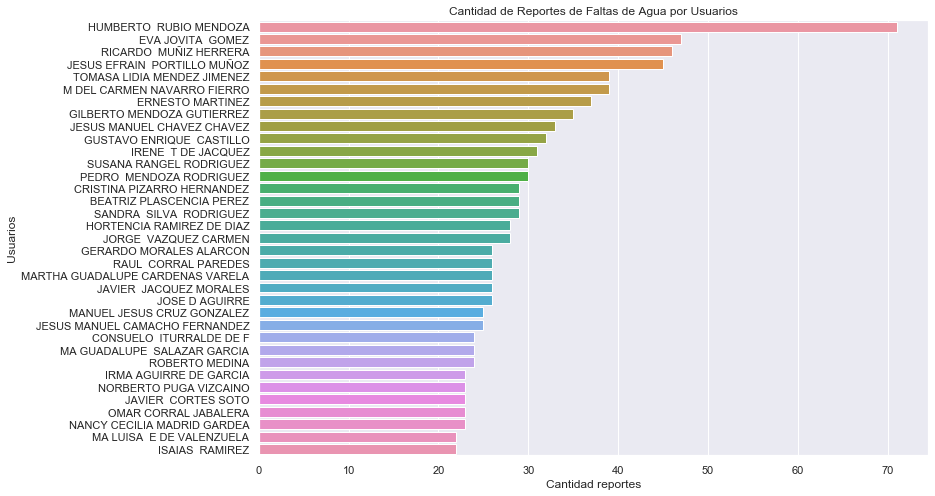

In [99]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, y='usuario', order=df['usuario'].value_counts().iloc[:35].index)
plt.title('Cantidad de Reportes de Faltas de Agua por Usuarios')
plt.xlabel('Cantidad reportes')
plt.ylabel('Usuarios')

In [63]:
zonas = df.groupby('zona')
colonias = df.groupby('colonia')

In [29]:
zonas.groups.keys()

dict_keys(['SOP NORTE', 'SOP SUR', 'Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6'])

In [30]:
df.count()

no. Folio             17675
tipo de problema      17675
zona                  17675
colonia               17675
solucion/respuesta    17590
status folio          17675
Year                  17675
Month                 17675
Weekday Name          17675
dtype: int64

In [32]:
df.colonia.value_counts()

SANTA ROSA                     651
MARMOL                         524
CERRO DE LA CRUZ               495
VILLA JUAREZ                   479
LEALTAD                        391
                              ... 
CLUB CAMPESTRE DE CHIHUAHUA      1
RACHALI                          1
SAN FELIPE VIEJO                 1
POZOS DEL VALLE                  1
FIDEL VELAZQUEZ                  1
Name: colonia, Length: 532, dtype: int64

In [33]:
df.zona.value_counts()

Zona 5       6731
Zona 4       3677
Zona 6       2733
Zona 2       1764
Zona 3       1692
Zona 1       1074
SOP NORTE       3
SOP SUR         1
Name: zona, dtype: int64

In [35]:
df.Month.value_counts()

6.0     4755
5.0     2120
2.0     1646
4.0     1553
3.0     1528
1.0     1335
8.0     1181
7.0     1049
12.0     955
9.0      604
10.0     477
11.0     472
Name: Month, dtype: int64

In [45]:
df.groupby(df.index.date).sum()

no. Folio      Year   Month  Weekday Name    Week
2018-06-01  60283535.0  476248.0  1416.0         944.0  5192.0
2018-06-02  75725254.0  597328.0  1776.0        1480.0  6512.0
2018-06-03  28681701.0  226016.0   672.0         672.0  2464.0
2018-06-04  32036172.0  252250.0   750.0           0.0  2875.0
2018-06-05  35661424.0  280502.0   834.0         139.0  3197.0
...                ...       ...     ...           ...     ...
2019-06-15  13826865.0   88836.0   264.0         220.0  1056.0
2019-06-16  12259819.0   78741.0   234.0         234.0   936.0
2019-06-17  16352593.0  104988.0   312.0           0.0  1300.0
2019-06-18  26435538.0  169596.0   504.0          84.0  2100.0
2019-06-19  29283589.0  187767.0   558.0         186.0  2325.0

[384 rows x 5 columns]

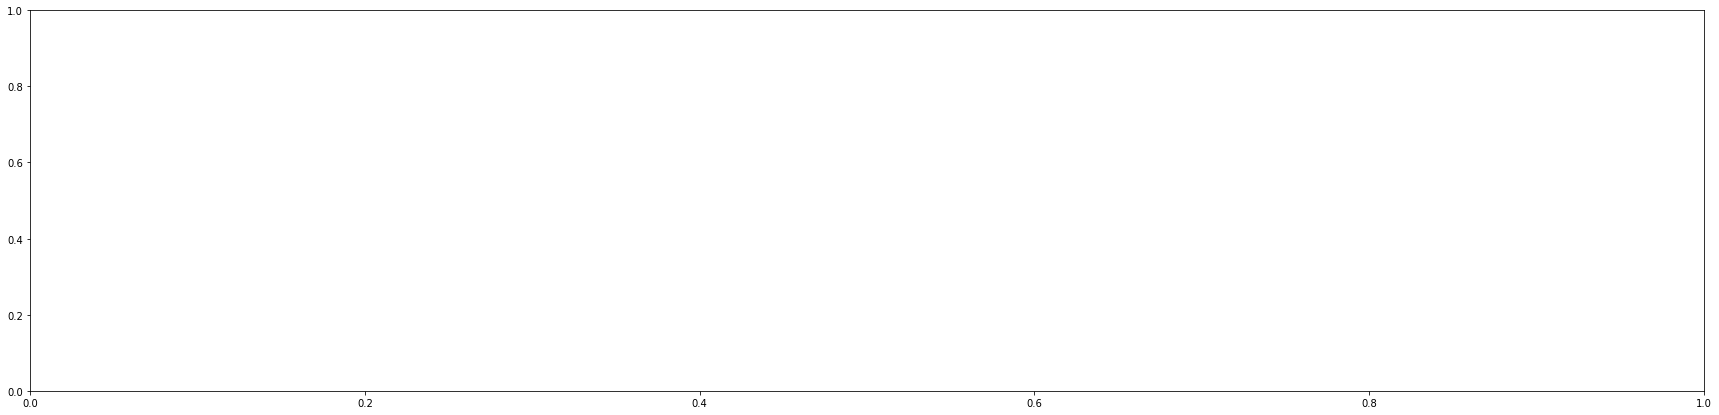

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,7))

In [124]:
df

no. Folio tipo de problema    zona             colonia  \
fecha                                                                         
2018-06-01 04:43:00   255282.0    Falta de Agua  Zona 3             GRANJAS   
2018-06-01 04:53:00   255283.0    Falta de Agua  Zona 5              MARMOL   
2018-06-01 05:14:00   255285.0    Falta de Agua  Zona 5  DIVISION DEL NORTE   
2018-06-01 05:18:00   255286.0    Falta de Agua  Zona 3             GRANJAS   
2018-06-01 05:22:00   255287.0    Falta de Agua  Zona 5              MARMOL   
...                        ...              ...     ...                 ...   
2019-06-19 10:43:00   314949.0    Falta de Agua  Zona 4      ALFREDO CHAVEZ   
2019-06-19 10:46:00   314951.0    Falta de Agua  Zona 5        VILLA JUAREZ   
2019-06-19 10:53:00   314955.0    Falta de Agua  Zona 6             POPULAR   
2019-06-19 11:12:00   314958.0    Falta de Agua  Zona 5        VILLA JUAREZ   
2019-06-19 11:13:00   314959.0    Falta de Agua  Zona 6         ARQUITECTOS   

                                      solucion/respuesta status folio    Year  \
fecha                                                                           
2018-06-01 04:43:00                 Bajo nivel de tanque    Terminado  2018.0   
2018-06-01 04:53:00                BAJO NIVEL DEL TANQUE    Terminado  2018.0   
2018-06-01 05:14:00                 LLEGO TARDE SERVICIO    Terminado  2018.0   
2018-06-01 05:18:00                 Bajo nivel de tanque    Terminado  2018.0   
2018-06-01 05:22:00                BAJO NIVEL DEL TANQUE    Terminado  2018.0   
...                                                  ...          ...     ...   
2019-06-19 10:43:00  SE VA A SECCIONAR PARA DAR SERVICIO     Asociado  2019.0   
2019-06-19 10:46:00                                  NaN     Validado  2019.0   
2019-06-19 10:53:00                                  NaN     Validado  2019.0   
2019-06-19 11:12:00                                  NaN     Validado  2019.0   
2019-06-19 11:13:00                                  NaN     Validado  2019.0   

                     Month  Week  Weekday Name  
fecha                                           
2018-06-01 04:43:00    6.0  22.0           4.0  
2018-06-01 04:53:00    6.0  22.0           4.0  
2018-06-01 05:14:00    6.0  22.0           4.0  
2018-06-01 05:18:00    6.0  22.0           4.0  
2018-06-01 05:22:00    6.0  22.0           4.0  
...                    ...   ...           ...  
2019-06-19 10:43:00    6.0  25.0           2.0  
2019-06-19 10:46:00    6.0  25.0           2.0  
2019-06-19 10:53:00    6.0  25.0           2.0  
2019-06-19 11:12:00    6.0  25.0           2.0  
2019-06-19 11:13:00    6.0  25.0           2.0  

[17982 rows x 10 columns]

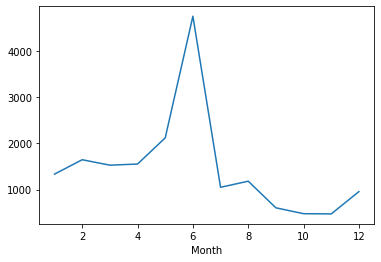

In [56]:
df.groupby('Month').count()['zona'].plot()

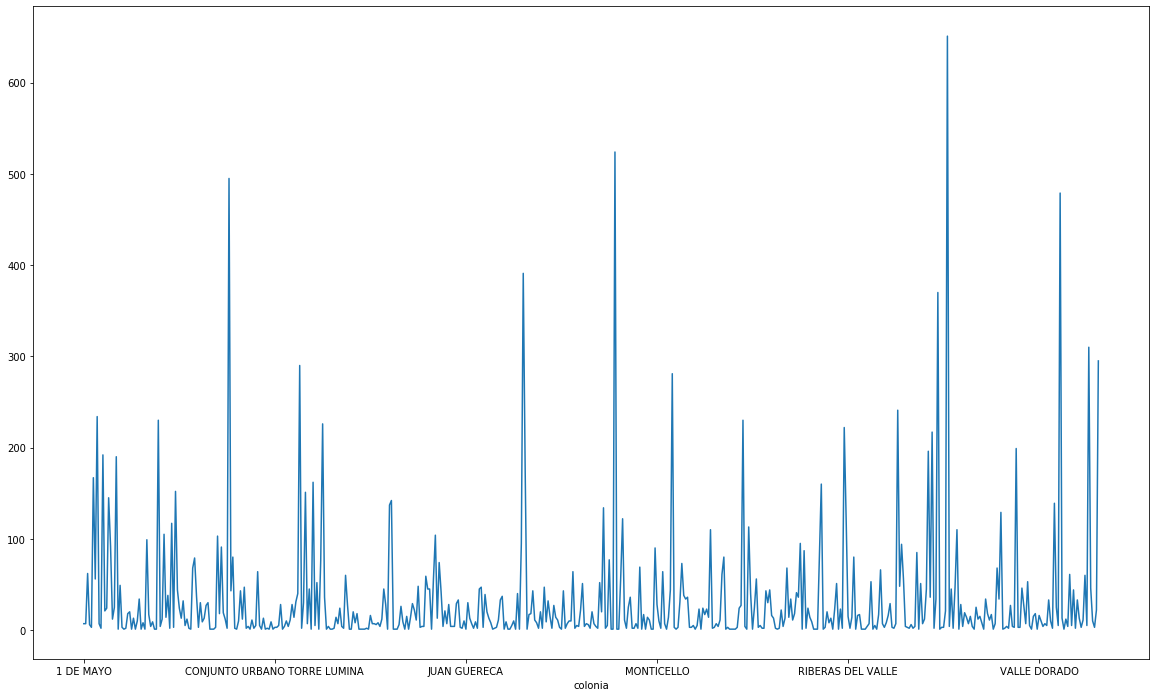

In [65]:
df.groupby('colonia').count()['zona'].plot(figsize=(20,12))

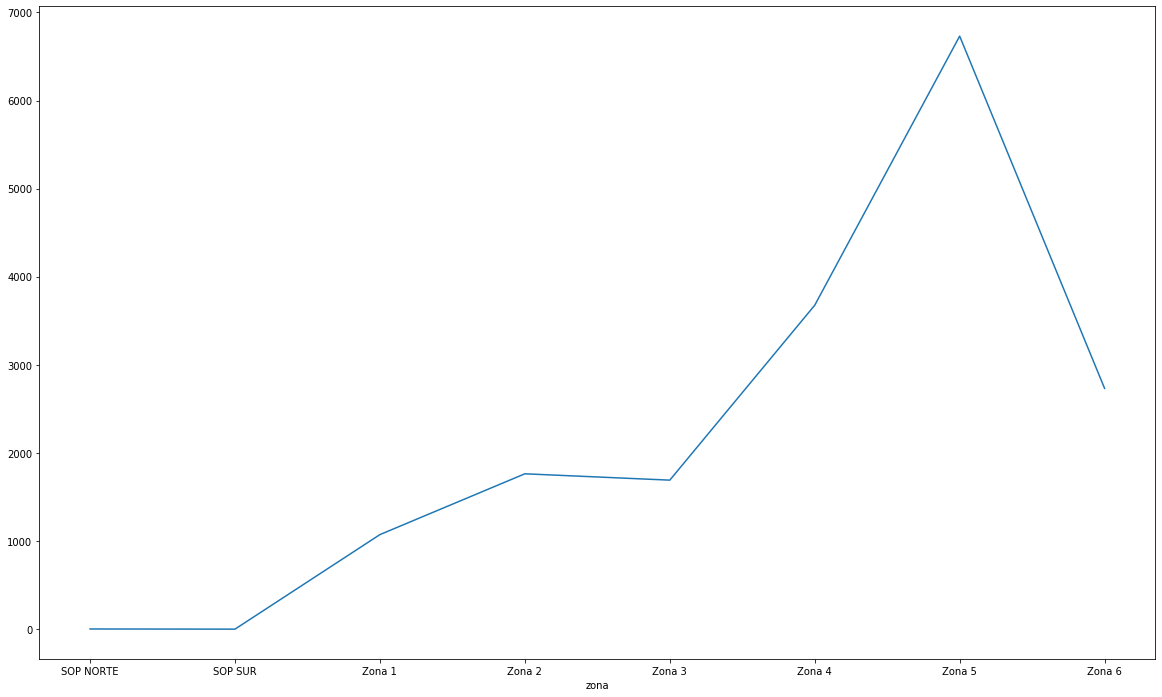

In [72]:
df.groupby('zona').count()['colonia'].plot(figsize=(20,12))

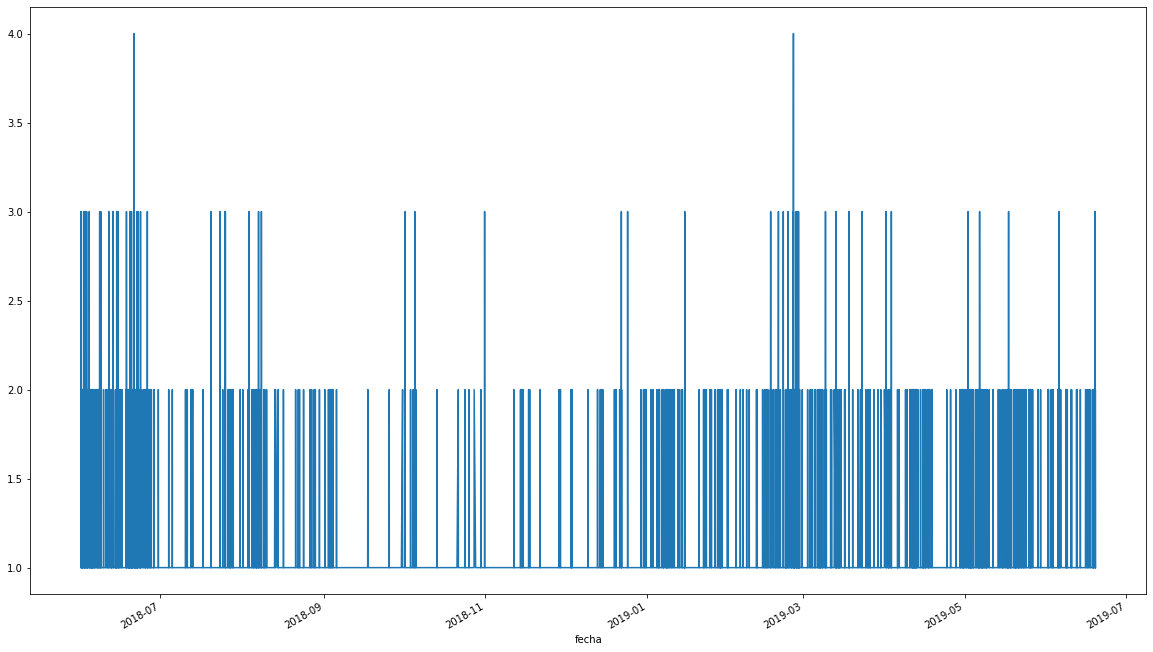

In [79]:
df.groupby(df.index).count()['colonia'].plot(figsize=(20,12))

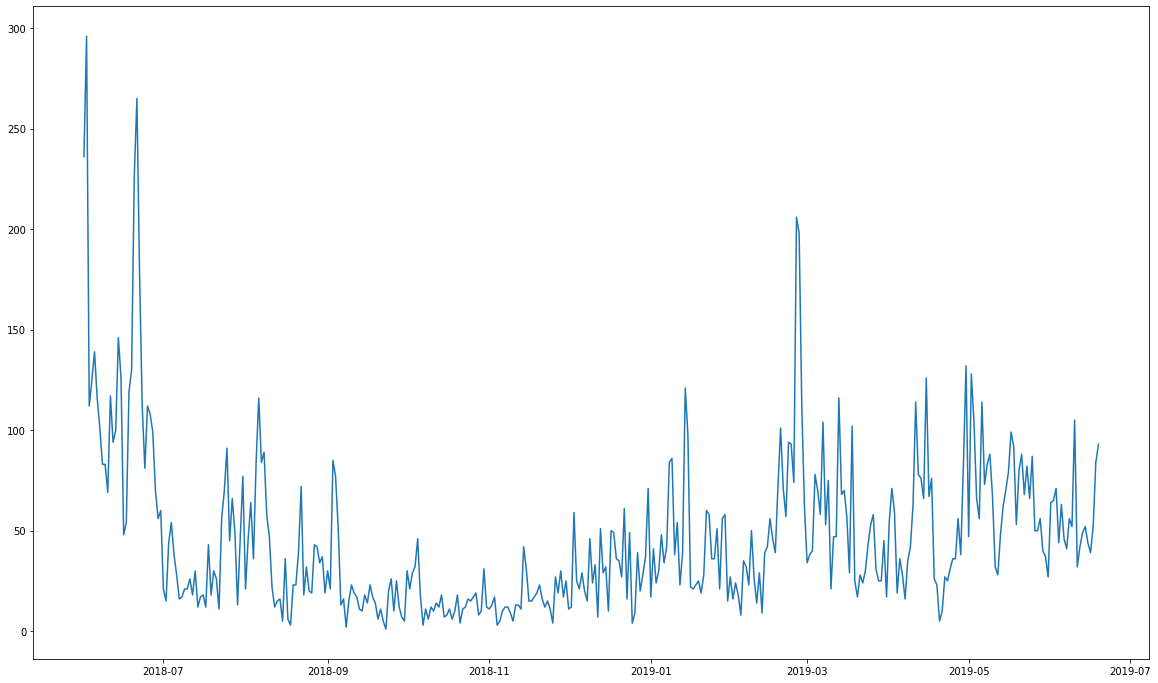

In [80]:
df.groupby(df.index.date).count()['colonia'].plot(figsize=(20,12))

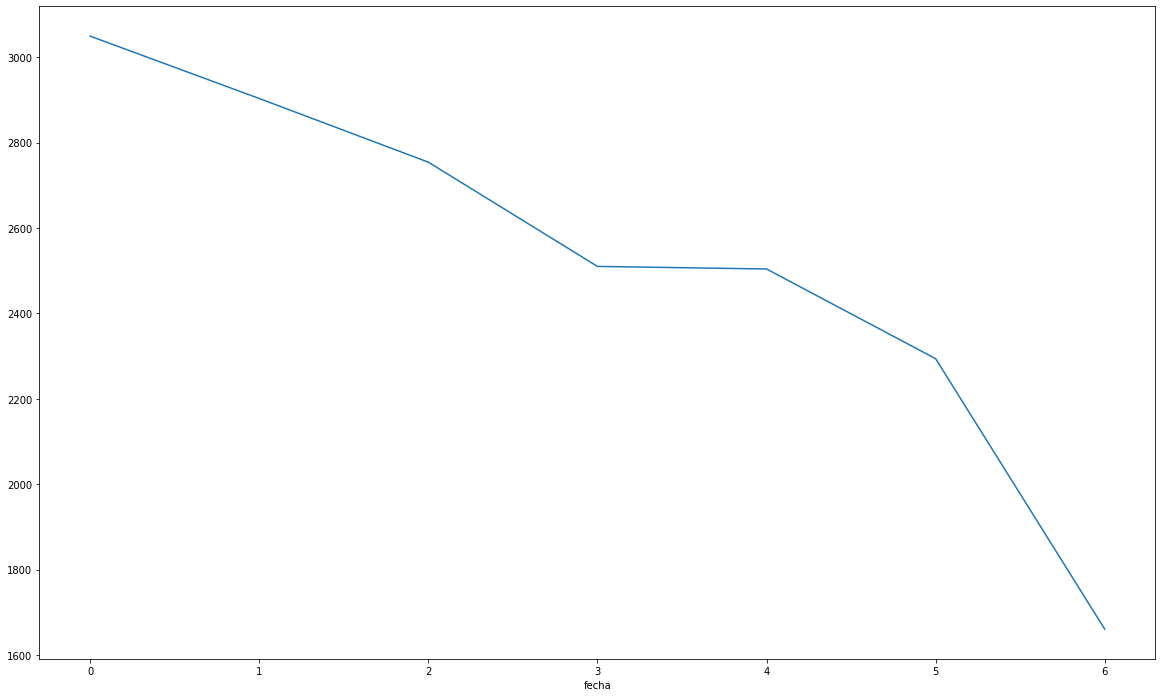

In [83]:
df.groupby(df.index.weekday).count()['colonia'].plot(figsize=(20,12))

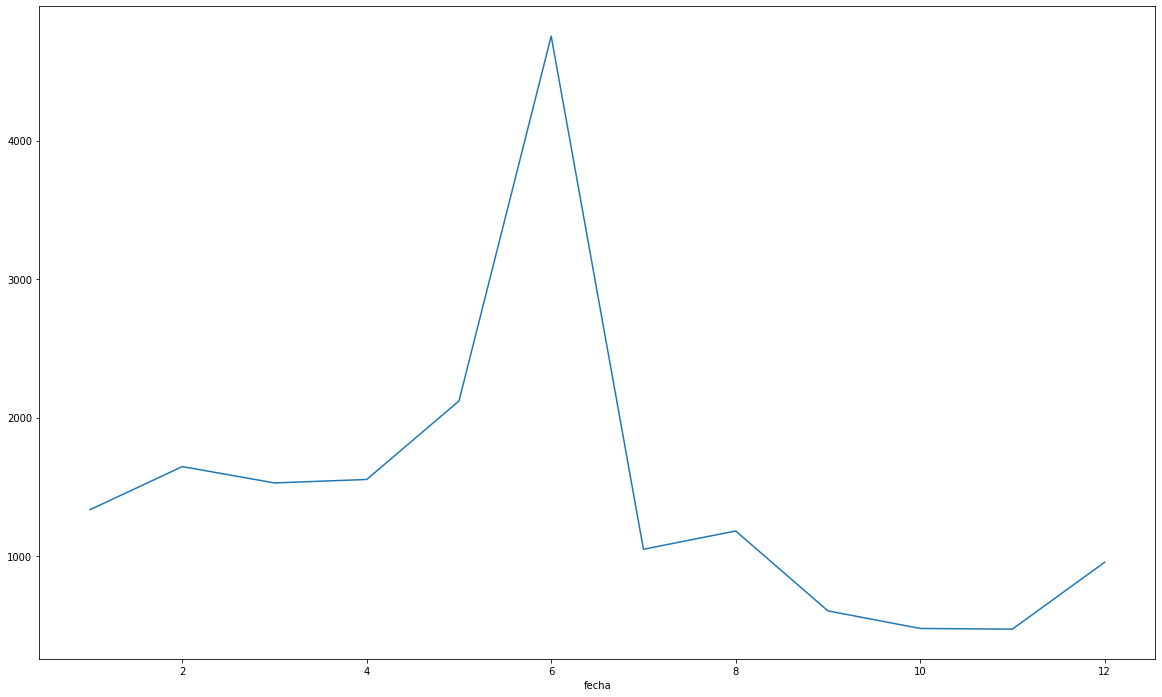

In [86]:
df.groupby(df.index.month).count()['colonia'].plot(figsize=(20,12))